<a href="https://colab.research.google.com/github/ManvikaTuteja/Machine-Learning-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
from random import random
import math 
import matplotlib.pyplot as plt
import sklearn
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
from dataclasses import dataclass, field
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
import itertools

from imblearn.over_sampling import SMOTE 

from scipy import optimize
from scipy.stats import norm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change for yours (keep this one commented)
dir = '/content/drive/MyDrive/NEU/IE7300/IE 7300_Project/'

In [ ]:
!ls

online_shoppers_intention.csv  sample_data


# Data

In [ ]:
#df = pd.read_csv(dir + "online_shoppers_intention.csv") 
df = pd.read_csv("online_shoppers_intention.csv") 
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12328, 18)

In [ ]:
print(df.info())
print('\n*Re-check* The number of missing values of each column is:\n', end ='')
print(df.isnull().sum())
print('\nThe dataset shape is', df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12328 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12328 non-null  int64  
 1   Administrative_Duration  12328 non-null  float64
 2   Informational            12328 non-null  int64  
 3   Informational_Duration   12328 non-null  float64
 4   ProductRelated           12328 non-null  int64  
 5   ProductRelated_Duration  12328 non-null  float64
 6   BounceRates              12328 non-null  float64
 7   ExitRates                12328 non-null  float64
 8   PageValues               12328 non-null  float64
 9   SpecialDay               12328 non-null  float64
 10  Month                    12328 non-null  object 
 11  OperatingSystems         12328 non-null  int64  
 12  Browser                  12328 non-null  int64  
 13  Region                   12328 non-null  int64  
 14  TrafficType           

# Feature engineering

In [ ]:
# Date to number
df["Month"] = np.where(df["Month"] == "June", "Jun", df["Month"])
df["Month_int"] = pd.to_datetime(df.Month, format='%b').dt.month

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Month_int
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2


In [ ]:
# VisitorType - create dummies
print(df.shape)
df = pd.get_dummies(df, columns = ["VisitorType"])
print(df.shape)

# Weekend - boolean to 1 and 0s
df["Weekend"] = np.where(df["Weekend"] == True, 1, 0)


(12328, 19)
(12328, 21)


# EDA

Color Options 
1. Coral #F96167, Yellow #FCE77D
2. Sky Blue #89ABE3FF, Bubblegum Pink #EA738DFF
3. Light Blue #ADD8E6, Dark Blue #00008b
4. Charcoal #101820FF, Yellow #FEE715FF 
5. Lime Green #CCF381, Sky Blue #89ABE3FF


Text(0.5, 1.0, 'Correlation heatmap of all features and target (Revenue)')

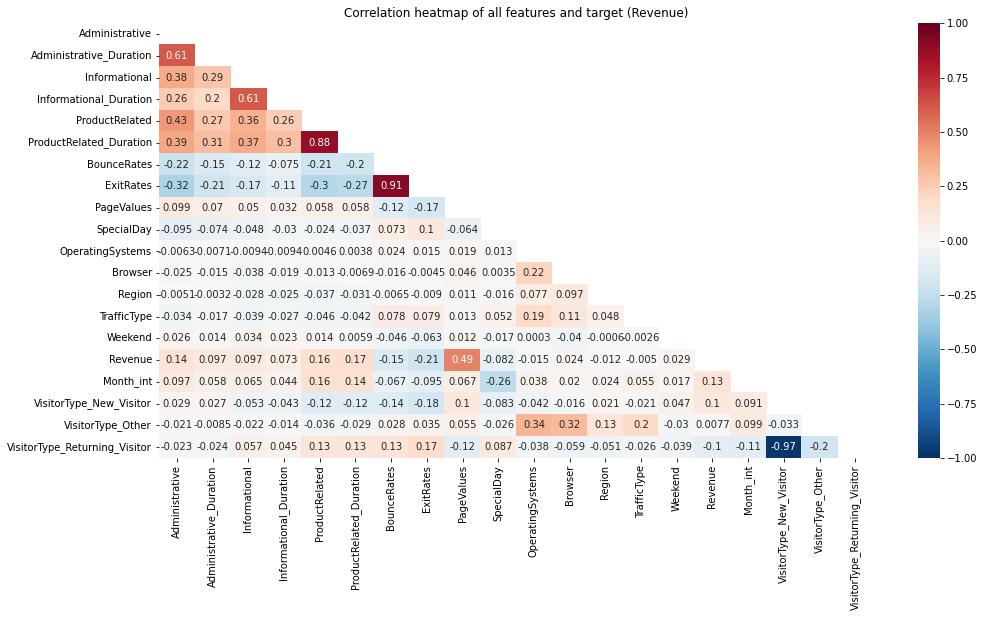

In [ ]:
matrix = np.triu(df.corr())
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, cmap="RdBu_r")
plt.title("Correlation heatmap of all features and target (Revenue)")

Conclusions from Correlation: 
- Highly correlated: exit and bounce rates are highly correlated, we will keep only one of this. Product Related duration and Product Related are also highly correlated and will remove one of them
- Revenue seems to be highest correlated (linearly) with page values in a positive way. Negatively, it has some relation with exit rates
- Between bounce and exit rates we keep exit rates due to its higher correlation to target variable
- Product Related and Product Related Duration have similar impact on revenue, therefore any can be removed

In [ ]:
# # T-SNE visualization
# x = df.drop(columns=["Revenue", "Month"])
# tsne = TSNE(n_components=2, verbose=1, random_state=123)
# z = tsne.fit_transform(x) 

# df_tsne = pd.DataFrame()
# df_tsne["y"] = df["Revenue"]
# df_tsne["comp-1"] = z[:,0]
# df_tsne["comp-2"] = z[:,1]

# sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
#                 palette=sns.color_palette("hls", 2),
#                 data=df_tsne).set(title="T-SNE projection") 

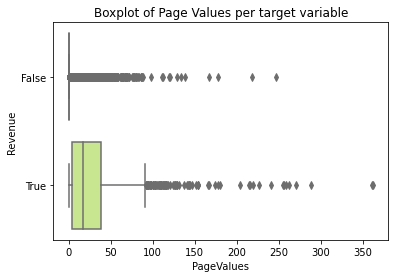

In [ ]:
# Boxplots 
# PageValue 
df["Revenue"] = df["Revenue"].astype("str")
#sns.boxplot(data=df, x="PageValues", y="Revenue", hue="Revenue", dodge=False)
my_pal = {"True": "#CCF381", "False": "#89ABE3FF"}
sns.boxplot(data=df, x="PageValues", y="Revenue",  palette=my_pal, dodge=False)
plt.title("Boxplot of Page Values per target variable")

# Back to boolearn
df["Revenue"] = df["Revenue"].map({'False':False, 'True':True})

Summary: 
- Most cases where there is no Revenue PageValue is most of the time around 0 while the ones that created value have higher values in a wider range

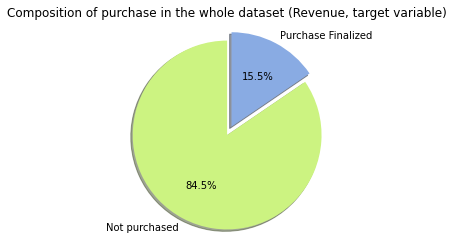

In [ ]:
# 1. Imbalanced target variable plot - pie chart

# Data for the pie chart
labels = 'Not purchased', 'Purchase Finalized'
sizes = [df.Revenue.value_counts()[False],df.Revenue.value_counts()[True]]
explode = (0.1, 0)

# Plot
fig1, ax1 = plt.subplots()
mycolors = ["#CCF381", "#89ABE3FF"]
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = mycolors)
ax1.axis('equal')
plt.title("Composition of purchase in the whole dataset (Revenue, target variable)")
plt.show()

Text(0.5, 1.0, 'Relationship between selected features and target variable (revenue)')

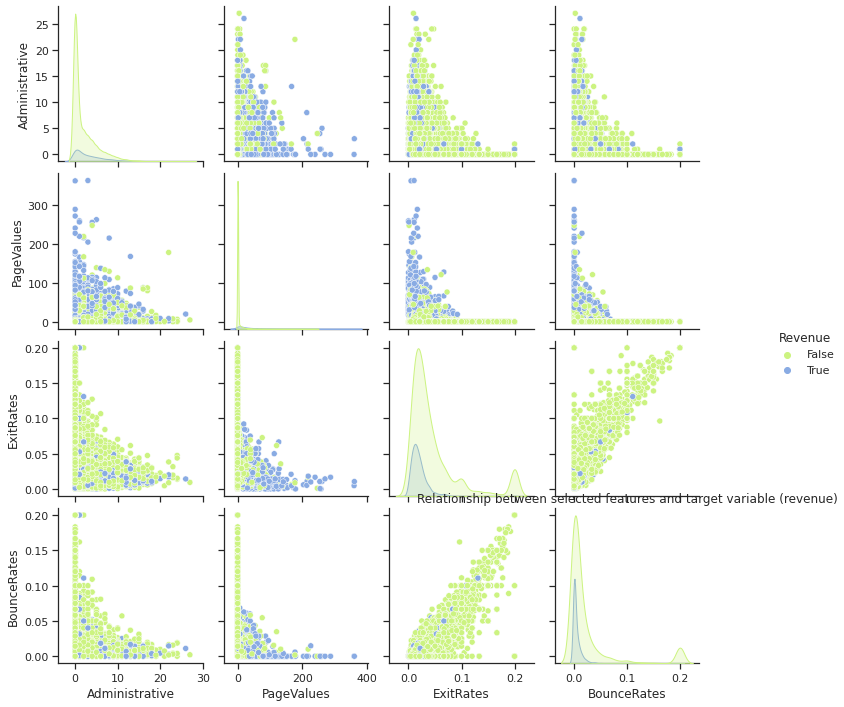

In [ ]:
# 2. Scatterplot  target vs continous variables (Fengbo)

# Select important columns woulf like to plot
dfPlotTwo = df[["Administrative","PageValues","ExitRates","BounceRates","Revenue"]]

# Plot
sns.set_theme(style="ticks")
my_pal = {"True": "#CCF381", "False": "#89ABE3FF"}
#sns.pairplot(dfPlotTwo, palette = my_pal)
sns.pairplot(dfPlotTwo, hue= "Revenue", palette=sns.color_palette(["#CCF381", "#89ABE3FF"]))
plt.title("Relationship between selected features and target variable (revenue)")

Text(0.5, 1.0, 'Effect of Region on revenue')

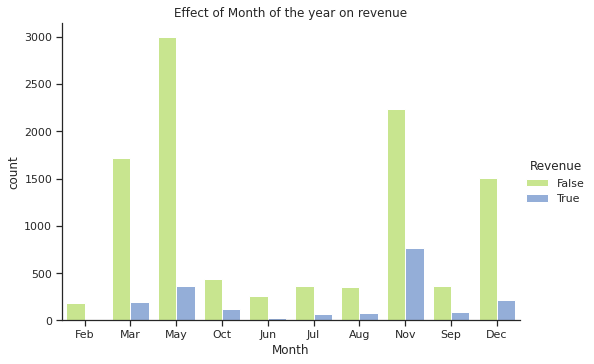

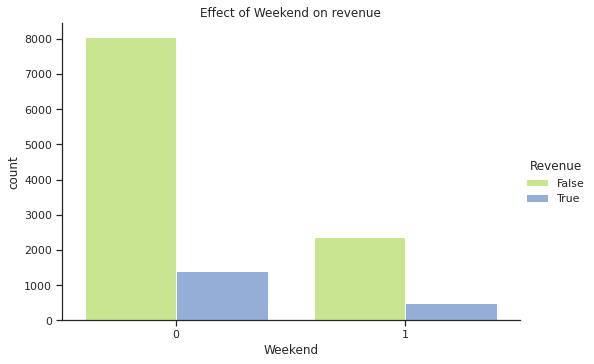

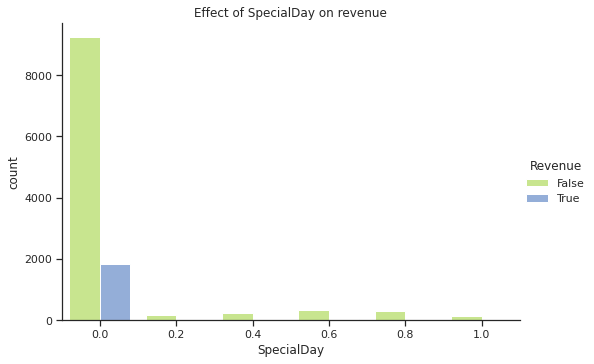

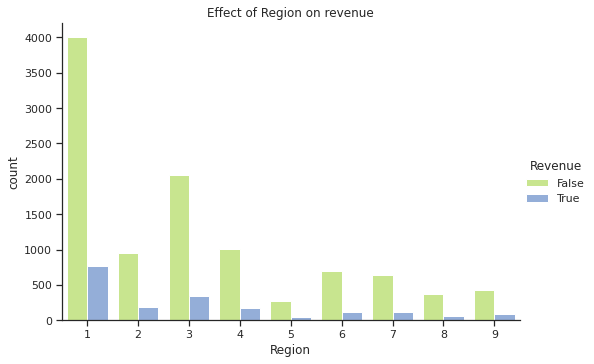

In [ ]:
#Non continuous bivariate bar plots with target variable 


sns.catplot(kind = 'count', data = df, x = 'Month', hue = 'Revenue', palette=sns.color_palette(["#CCF381", "#89ABE3FF"]), aspect = 1.5)
plt.title('Effect of Month of the year on revenue')

sns.catplot(kind = 'count', data = df, x = 'Weekend', hue = 'Revenue', palette=sns.color_palette(["#CCF381", "#89ABE3FF"]), aspect = 1.5)
plt.title('Effect of Weekend on revenue')

sns.catplot(kind = 'count', data = df, x = 'SpecialDay', hue = 'Revenue',palette=sns.color_palette(["#CCF381", "#89ABE3FF"]), aspect = 1.5)
plt.title('Effect of SpecialDay on revenue')


sns.catplot(kind = 'count', data = df, x = 'Region', hue = 'Revenue', palette=sns.color_palette(["#CCF381", "#89ABE3FF"]), aspect = 1.5)
plt.title('Effect of Region on revenue')

Text(0.5, 0, 'Feature')

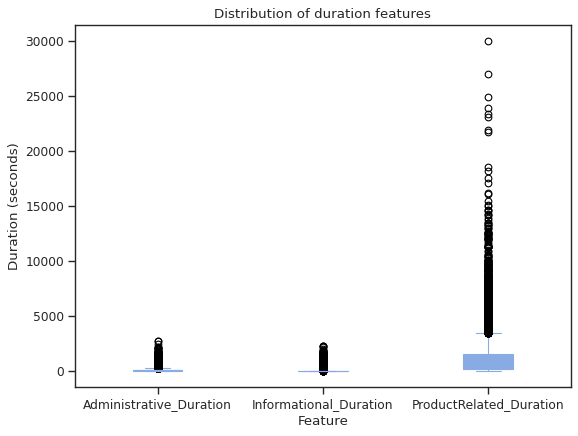

In [ ]:
#Boxplots to see variation in data distribution for duration variables - (additional can totally remove if required - mt)
plt.figure(figsize=(8, 6), dpi=80)
df.boxplot(column=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], return_type = 'axes',  color="#89ABE3FF",  patch_artist=True)
plt.grid(b=None)
plt.title("Distribution of duration features")
plt.ylabel("Duration (seconds)")
plt.xlabel("Feature")

In [ ]:
#Dropping outliers based on hours - more than ~11 hours (40000 seconds) sounds too much for being in a site
q_hi  = 40000
prior_shape = df.shape[0]
df = df[(df["ProductRelated_Duration"] <= q_hi)]
print("Removing outliers of producrelated duration, new maximum is: {} and number of points deleted is: {}".format(q_hi, prior_shape - df.shape[0]))


Removing outliers of producrelated duration, new maximum is: 40000 and number of points deleted is: 0


Text(0.5, 0, 'Feature')

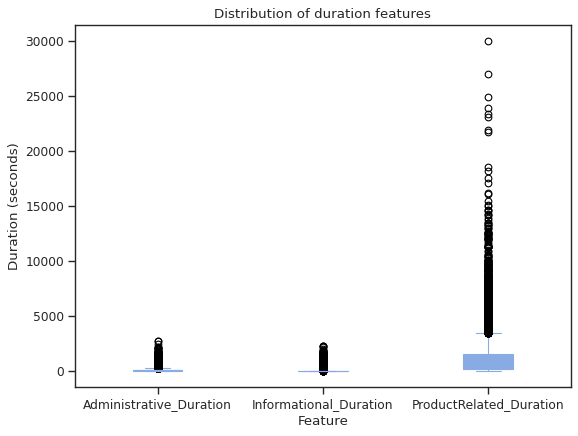

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
df.boxplot(column=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], return_type = 'axes',  color="#89ABE3FF",  patch_artist=True)
plt.grid(b=None)
plt.title("Distribution of duration features")
plt.ylabel("Duration (seconds)")
plt.xlabel("Feature")

# Final preparation for modeling

In [ ]:
# Steps that are required by all datasets
def splitTrainTest(X,y):
    """ 
    Splits into train and text 
    """
    X_train, X_test, y_train, y_test = train_test_split(X,
      y, 
      test_size=0.3, 
      shuffle=True, 
      random_state=0)
    return X_train, X_test, y_train, y_test

def normalizeTrain(X):
    """
    Scale train data
    """
    mean = np.mean(X, 0) # per column 
    std = np.std(X, 0) # per column 
    normalized = (X-mean)/std
    return normalized, mean, std 

def normalizeTest(X, mean, std):
    """
    Scale test data
    """
    normalized = (X-mean)/std
    return normalized

In [ ]:
# Initial values
X = df.drop(columns=["Revenue", "ProductRelated_Duration", "Month", "VisitorType_New_Visitor", "BounceRates"])
y = df["Revenue"]
print(X.shape)

(12328, 16)


In [ ]:
# Perform operations
X_train, X_test, y_train, y_test = splitTrainTest(X,y)
X_train, mean, std = normalizeTrain(X_train)
X_test = normalizeTest(X_test, mean, std)

# Reset index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


## Balancing classes

In [ ]:
from collections import Counter
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train_smote)
print(counter)

Counter({False: 7305, True: 7305})


In [ ]:
n_under = sum(y_train == 1)
# # Undersampling
train_1_index = np.where(y_train == 1)[0]
train_0_index = np.where(y_train == 0)[0]
np.random.seed(0)
np.random.shuffle(train_0_index)
train_0_index = train_0_index[:n_under]
train_index = np.concatenate([train_0_index,train_1_index])
X_train_under = X_train.iloc[train_index, :].reset_index(drop=True)
y_train_under = y_train[train_index].reset_index(drop=True)
print(X_train_under.shape, y_train_under.shape)

(2648, 16) (2648,)


# Models' classes

### 1. Logistic regression

In [ ]:
@dataclass
class LogisticRegression:

    maxIteration: int
    learningRate: float
    epsilon: float
    train_X: pd.DataFrame
    train_y: pd.Series
    test_X: pd.DataFrame
    test_y: pd.Series
    k: int = 1

    def __post_init__(self):
      # Add intercepts
      self.train_X = self.addX0(self.train_X)
      self.test_X = self.addX0(self.test_X)


    def addX0(self, X): 
        """
        Add bias/intercept term
        """
        return np.column_stack([np.ones(X.shape[0]), X])

    def sigmoid(self, z):
        """
        Sigmoid function
        """
        sig = 1/(1 + np.exp(-z))
        return sig
    
    def predict_f(self, X):
        return X.dot(self.w)

    def predict(self, X):
      if X.shape[1] < len(self.w):
        X = self.addX0(X)
      return self.sigmoid(self.predict_f(X))

    def costFunction(self, X, y):
        """
        Cost function:
        1. J(w) = - L(w) = sum(log(1+e^z) - yz)
            Where z = wtx = Xw dot product
            Derivation is sum(sigmoid(z)x - yx)

        2. Other cost function: log-loss
        """
        # Log-loss
        sig = self.sigmoid(self.predict_f(X)) # nx1
        loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
        cost = -loss.sum() # scalar

        # Second approach
        pred = self.predict_f(X)
        cost = (np.log(np.ones(X.shape[0]) + np.exp(pred)) - pred*y).sum()

        return cost
    
    def costDerivative(self, X, y):
        """ 
        Cost Derivative 
        """
        sig = self.sigmoid(self.predict_f(X))
        grad = (sig - y).dot(X) # d columns on gradients - d values as it is coeffs
        return grad
    
    def gradientDescent(self, X, y):
        """ 
        Gradient descent
        """
        errors = []
        last = float('inf')

        for i in tqdm(range(self.maxIteration)):
          self.w = self.w - self.learningRate * self.costDerivative(X, y)
          # compute error
          current = self.costFunction(X, y)
          errors.append(current)
          # compare to previous
          diff = abs(last - current)
          last = current

          if diff < self.epsilon: 
              print("The model stopped learning")
              break

        self.plot_cost(errors)

    def evaluate(self, y, y_hat_proba, threshold = 0.5):
        """ 
        Evaluates the model's performance: precision, recall and f1-score
        """
        y_hat_bin = np.where(y_hat_proba >= threshold, 1, 0)
        y = (y == 1) # converts to boolean
        y_hat = (y_hat_bin == 1)
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * ((precision*recall)/(precision+recall))
        return round(f_score, 3), round(precision, 3), round(recall, 3)

    
    def confusion_matrix(self, y, y_hat_proba, threshold = 0.5):
      """
      Confusion matrix heatmap
      """
      y_hat_bin = np.where(y_hat_proba >= threshold, 1, 0)
      table = pd.crosstab(y, y_hat_bin)
      plt.figure(figsize = (10,7))
      p = sns.heatmap(table, annot=True, fmt='g', cmap = "Blues")
      p.set_xlabel('Prediction', fontsize=10)
      p.set_ylabel('Actual', fontsize=10)
      p.set_title('Confusion matrix with threshold={}'.format(threshold))

      return p
    
    def fit(self):
        """ 
        Fit the model in the right sequence of functions
        """

        # Initiating Ws
        self.w = np.ones([self.train_X.shape[1]], dtype = np.float64)
        self.gradientDescent(self.train_X, self.train_y)
        # Measure performance
        y_hat_train = self.sigmoid(self.predict_f(self.train_X)) # probability, no binary yet
        y_hat_train = np.around(y_hat_train) # binary
        f_score_train, precision_train, recall_train = self.evaluate(self.train_y, y_hat_train)
        y_hat_test = self.sigmoid(self.predict_f(self.test_X)) # probability, no binary yet
        y_hat_test_proba = y_hat_test
        y_hat_test = np.around(y_hat_test) # binary
        f_score_test, precision_test, recall_test = self.evaluate(self.test_y, y_hat_test)
        print("The TRAINING f1-score was {} and precision was {} and recall was {}".format(f_score_train, precision_train, recall_train))
        print("The TESTING f1-score was {} and precision was {} and recall was {}".format(f_score_test, precision_test, recall_test))
        print("W:", self.w)
        return y_hat_test, y_hat_test_proba
    
    def kfold_fit(self):
        # Sample data
        np.random.seed(0) 
        train_X = self.train_X
        fold = np.random.randint(1, self.k+1, self.train_X.shape[0])
        folds_fscore = []
        for i in range(1, self.k+1):
          not_k_index = (fold != i)
          not_k_df = self.train_X[not_k_index]
          not_k_y = self.train_y[not_k_index]
          k_df = self.train_X[fold == i]
          k_y = self.train_y[fold == i]
          # Initiating Ws
          self.w = np.ones([not_k_df.shape[1]], dtype = np.float64)
          self.gradientDescent(not_k_df, not_k_y)

          # Measure performance
          y_hat_k = self.sigmoid(self.predict(k_df)) # probability, no binary yet
          y_hat_k_proba = y_hat_k
          y_hat_k = np.around(y_hat_k) # binary
          f_score_test, precision_test, recall_test = self.evaluate(k_y, y_hat_k)
          folds_fscore.append(f_score_test)
        print(folds_fscore)
        fscore = np.mean(folds_fscore)

        return fscore

        

    def plot_cost(self, cost_sequence):
        """ 
        Plot the errors at each iteration
        """
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel = "iterations", ylabel = "cost", title = "cost trends")
        ax.grid()
 #       plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, shadow = True)
        plt.show()


    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.train_X[:, 0], self.train_X[:, 1], 
                     self.sigmoid(self.train_X.dot(self.w)), 
                     c = self.train_y[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)




### 2. Naive Bayes Classifier

In [ ]:
categorical_features = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend","Month_int"]

In [ ]:
@dataclass 
class NaiveBayes:
  train_X: pd.DataFrame
  train_y: pd.Series
  test_X: pd.DataFrame
  test_y: pd.Series
  la_place_smoothing: bool
  categorical_features: list

  def __post_init__(self):
    self.fit()
  
  def fitGaussian(self, data):
    """
    One column at a time gaussian parameters to fit distribution
    """
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  def likelihood(self):
    """
    Distribution over each column, prior and data
    Returns prior * likelihood
    PDF gives probability of that data to be of that distribution.
    """
    # Stats an empty dataframe for all the parameters 
    index_values = np.concatenate(self.train_X.apply(lambda x: pd.unique(x).tolist()).values)
    likelihood_coefs = pd.DataFrame()
    if self.la_place_smoothing: 
        print("La Place Smoothing")
        for col in range(self.train_X.shape[1]):
          name_col = self.train_X.columns[col]
          if name_col in categorical_features:
            for obs in self.train_X.iloc[:,col].unique():
                for cat in [0,1]:
                    temp_df = pd.DataFrame(list(zip([(sum((self.train_X[name_col] == obs) & (self.train_y == cat)) +1)/(sum(self.train_y == cat) + self.train_X[name_col].nunique())],
                    [name_col + "_" + str(obs) + "_" + str(cat)])),
                    columns = ["value", "coeff_name"])
                    likelihood_coefs = pd.concat([likelihood_coefs,temp_df])
    else: 
        # No smoothing
        for col in range(self.train_X.shape[1]):
          name_col = self.train_X.columns[col]
          if self.train_X.columns[col] in categorical_features:
            for obs in self.train_X.iloc[:,col].unique():
                for cat in [0,1]:
                    temp_df = pd.DataFrame(list(zip((sum((self.train_X[name_col] == obs) & (self.train_y == cat)))/(sum(self.train_y == cat)),
                    [name_col + "_" + str(obs)+ "_" + str(cat)])),
                    columns = ["value", "coeff_name"])
                    likelihood_coefs = pd.concat([likelihood_coefs,temp_df])
    return likelihood_coefs


  def posterior(self, data, prior, likelihood_df, cat):
      posterior_val = prior
      for col in range(len(data)):
        name_col = self.train_X.columns[col]
        if name_col in categorical_features:
          likelihood_index = self.train_X.columns[col] + "_" + str(data[col]) + "_" + str(cat)
          if sum(likelihood_df["coeff_name"] == likelihood_index) > 0:
            likelihood_coeff = likelihood_df[likelihood_df["coeff_name"] == likelihood_index]["value"].values[0]
            posterior_val = posterior_val*likelihood_coeff 
          else:
            continue
        else: # continuous
          dist = self.fitGaussian(self.train_X[self.train_y == cat][name_col])
          likelihood_coeff = dist.pdf(data[col])
          posterior_val = posterior_val*likelihood_coeff 

      return posterior_val

  def fit(self):
      """
      Fits the model
      """
      # Split in class 1 and 0
      X0_data = self.train_X[self.train_y == 0]
      X1_data = self.train_X[self.train_y == 1]

      # Find prior
      self.prior_0 = len(X0_data)/len(self.train_X)
      self.prior_1 = len(X1_data)/len(self.train_X)
      print("priors:", self.prior_0, self.prior_1)

      # Find likelihood
      self.likelihood_df = self.likelihood()
      print("likelihoods:", self.likelihood_df)

  def predict(self, X):
      y_pred = []
      for i in tqdm(range(X.shape[0])):
        py0 = self.posterior(X.iloc[i,:], self.prior_0, self.likelihood_df, 0)
        py1 = self.posterior(X.iloc[i,:], self.prior_1, self.likelihood_df, 1)
        # print("The point belongs to class {} and the model \
        #     predicted {}".format(self.test_y[i], np.argmax([py0, py1])))
        y_pred_temp = np.argmax([py0, py1])
        y_pred.append(y_pred_temp)
      y_pred = pd.Series(y_pred)
      return y_pred

  def evaluate(self, y, y_hat):
      """ 
      Evaluates the model's performance: precision, recall and f1-score
      """
      y = (y == 1) # converts to boolean
      y = pd.Series([y_i==1 for y_i in y])
      y_hat = pd.Series([y_i==1 for y_i in y_hat])
      precision = (y & y_hat).sum() / y_hat.sum()
      recall = (y & y_hat).sum() / y.sum()
      f_score = 2 * ((precision*recall)/(precision+recall))
      return round(f_score, 2), round(precision, 2), round(recall, 2)

  def confusion_matrix(self, y, y_hat):
      """
      Confusion matrix heatmap
      """
      table = pd.crosstab(y, y_hat)
      plt.figure(figsize = (10,7))
      p = sns.heatmap(table, annot=True, fmt='g', cmap = "Blues")
      p.set_xlabel('Prediction', fontsize=10)
      p.set_ylabel('Actual', fontsize=10)
      return p

### 3. SVM

In [ ]:
class MaxMarginClassifier:
    def __init__(self, C, X, y, k=1):
        self.C = C
        self.k = k
        self.X = X
        self.y = y

    def fit(self, X = "None", y = "None"):
        if X == "None":
          X = self.X
        if y == "None":
          y = self.y
        Xy = X*y[:, np.newaxis] # convert y as column matrix
        GramXy = np.matmul(Xy, Xy.T)
        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
            return obj_fn

        def partialDerivationLd0(G, alpha):
            par_der = np.ones(alpha.shape) - alpha.dot(G)
            return par_der
        N = X.shape[0]
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C*np.ones(N)))
        constraints = ({'type':'eq', 'fun': lambda a: np.dot(a,y), 'jac':lambda a: y}, # sum alphaiyi = 0
                        {'type':'ineq', 'fun':lambda a: b - np.dot(A,a), 'jac':lambda a: -A})# inequality 0 <= alphai <= c
        alpha = np.ones(N)
        optRes = optimize.minimize(fun=lambda a: -Ld0(GramXy, a),
                                    x0=alpha, 
                                    method='SLSQP',
                                    jac = lambda a: -partialDerivationLd0(GramXy, a),
                                    constraints=constraints) # returns optimal alphas
        self.alpha = optRes.x
        # Alphas are zero when non support vector points 
        # Obtain optimal w*
        self.w = np.sum(self.alpha[:, np.newaxis]*Xy, axis=0)
        #  Obtain b - average of all support vector values 
        # Only support vector points - in real life they are not zero but a very small value
        epsilon = 1e-4
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]

        b = []
        for i in range(len(self.supportLabels)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)# equation b = y - wtx
            b.append(b_i)
        self.intercept = sum(b)/len(b)

    def kfold_fit(self):
        # Sample data
        np.random.seed(0) 
        train_X = self.X
        train_y = self.y
        fold = np.random.randint(1, self.k+1, train_X.shape[0])
        folds_fscore = []
        for i in range(1, self.k+1):
          not_k_index = (fold != i)
          not_k_df = train_X[not_k_index]
          not_k_y = train_y[not_k_index]
          k_df = train_X[fold == i]
          k_y = train_y[fold == i]

          self.fit(not_k_df, not_k_y)

          # Measure performance
          f_score_test, precision_test, recall_test = self.evaluate(k_df, k_y)
          folds_fscore.append(f_score_test)
        print(folds_fscore)
        fscore = np.mean(folds_fscore)

        return fscore
    
    def predict(self, X):
        """
        Prediction by using wt+b if positive then is class +1 and neg -1"""
        pred = 2 *(np.matmul(X, self.w) + self.intercept > 0) - 1
        return pred

    def evaluate(self, X, y, threshold = 0.5):
        """ 
        Evaluates the model's performance: precision, recall and f1-score
        """
        y = (y == 1) # converts to boolean
        y_hat = (self.predict(X) == 1)
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * ((precision*recall)/(precision+recall))
        return round(f_score, 3), round(precision, 3), round(recall, 3)

    def confusion_matrix(self, y, y_hat):
      """
      Confusion matrix heatmap
      """
      table = pd.crosstab(y, y_hat)
      plt.figure(figsize = (10,7))
      p = sns.heatmap(table, annot=True, fmt='g', cmap = "Blues")
      p.set_xlabel('Prediction', fontsize=10)
      p.set_ylabel('Actual', fontsize=10)
      return p

# Fit

### 1. Logistic regression

  2%|▏         | 79/5000 [00:00<00:48, 100.71it/s]


The model stopped learning


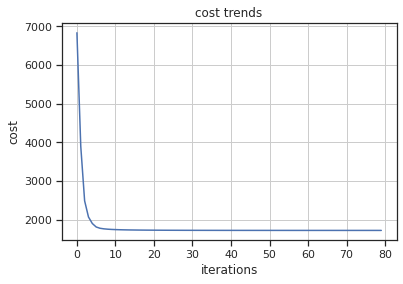

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 78/5000 [00:00<00:43, 113.67it/s]


The model stopped learning


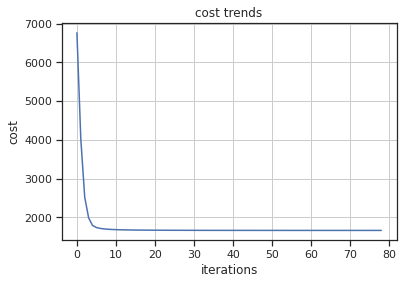

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 89/5000 [00:00<00:54, 90.66it/s]


The model stopped learning


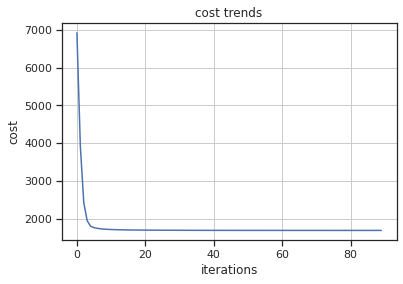

[0.269, 0.27, 0.259]

 F1  0.266


  2%|▏         | 114/5000 [00:00<00:42, 114.13it/s]


The model stopped learning


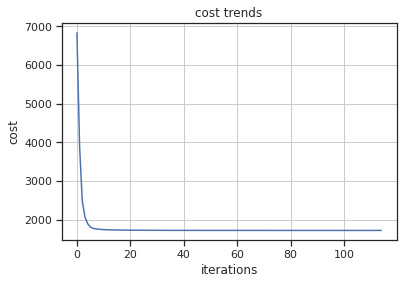

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 111/5000 [00:00<00:40, 119.58it/s]


The model stopped learning


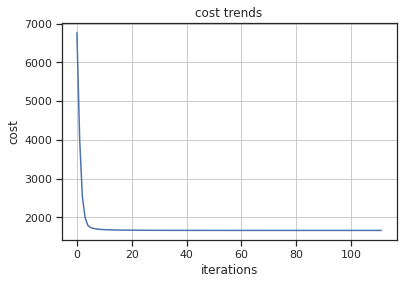

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 128/5000 [00:01<00:48, 99.71it/s]


The model stopped learning


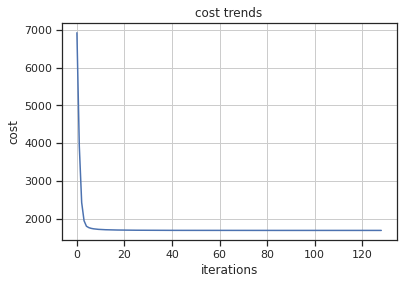

[0.269, 0.27, 0.259]

 F1  0.266


  3%|▎         | 149/5000 [00:00<00:16, 301.97it/s]


The model stopped learning


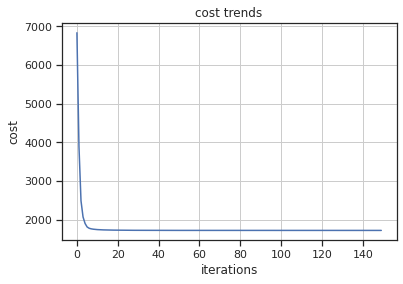

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 146/5000 [00:00<00:16, 299.15it/s]


The model stopped learning


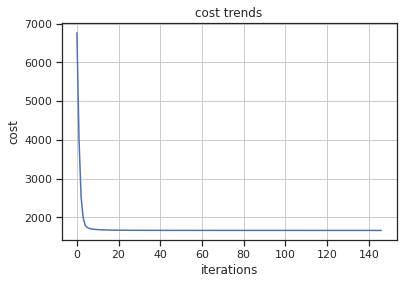

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 168/5000 [00:00<00:15, 319.86it/s]


The model stopped learning


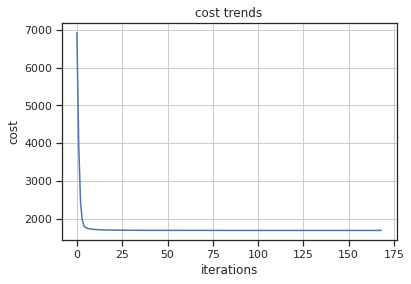

[0.269, 0.27, 0.259]

 F1  0.266


100%|██████████| 5000/5000 [00:16<00:00, 304.91it/s]


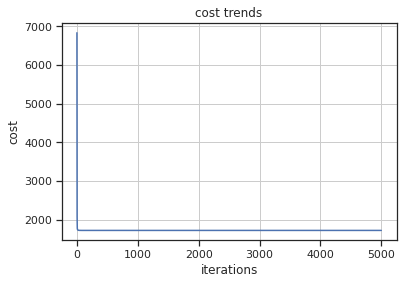

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:16<00:00, 306.88it/s]


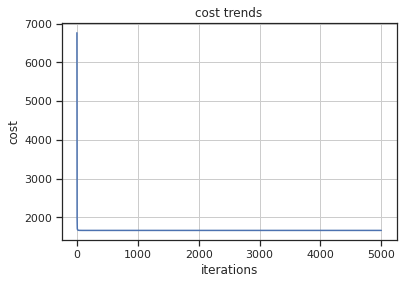

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:16<00:00, 299.53it/s]


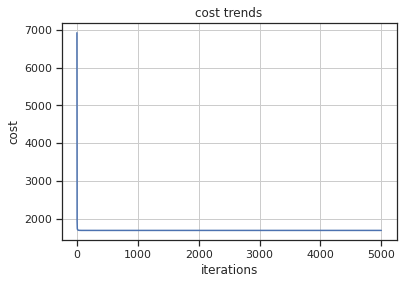

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 30%|███       | 1515/5000 [00:05<00:11, 301.68it/s]


The model stopped learning


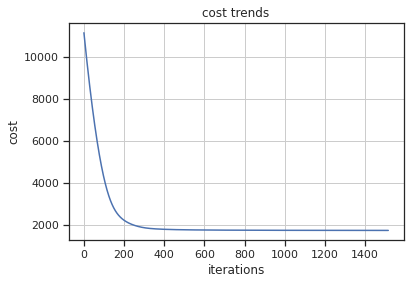

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 29%|██▉       | 1474/5000 [00:04<00:11, 302.65it/s]


The model stopped learning


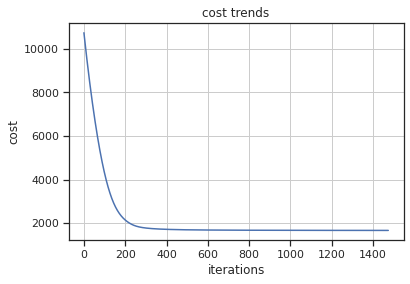

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 33%|███▎      | 1639/5000 [00:06<00:14, 239.97it/s]


The model stopped learning


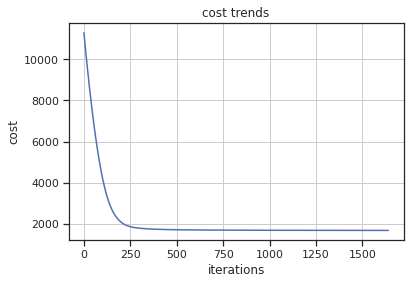

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 58%|█████▊    | 2925/5000 [00:09<00:07, 294.91it/s]


The model stopped learning


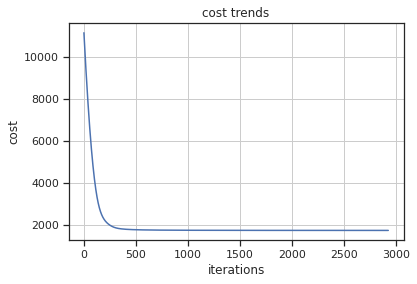

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 57%|█████▋    | 2858/5000 [00:09<00:07, 299.92it/s]


The model stopped learning


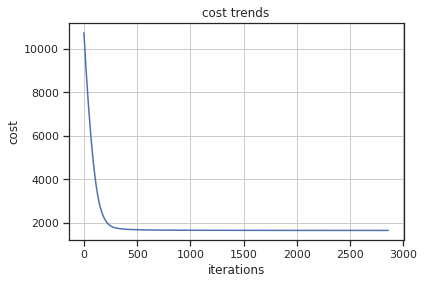

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 65%|██████▍   | 3235/5000 [00:11<00:06, 293.97it/s]


The model stopped learning


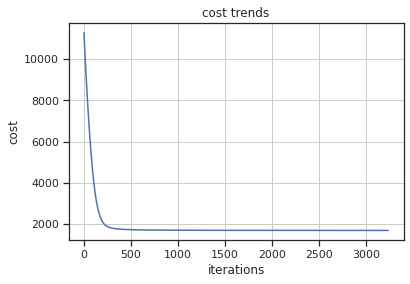

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 92%|█████████▏| 4599/5000 [00:15<00:01, 297.07it/s]


The model stopped learning


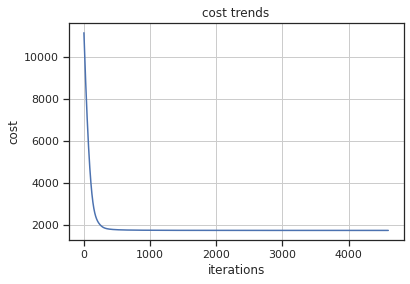

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 90%|████████▉ | 4493/5000 [00:15<00:01, 286.71it/s]


The model stopped learning


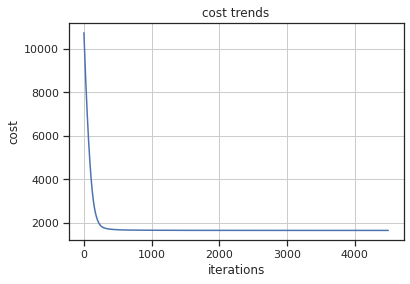

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:18<00:00, 272.05it/s]


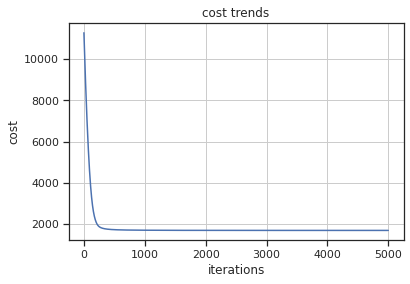

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:16<00:00, 295.28it/s]


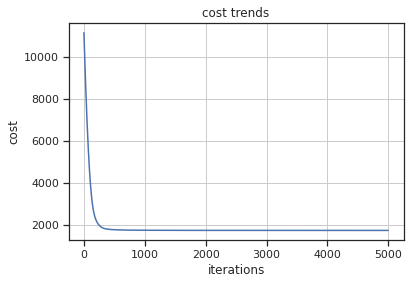

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 293.84it/s]


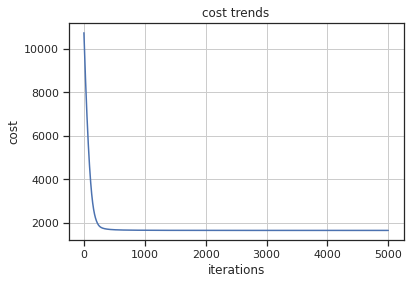

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 284.34it/s]


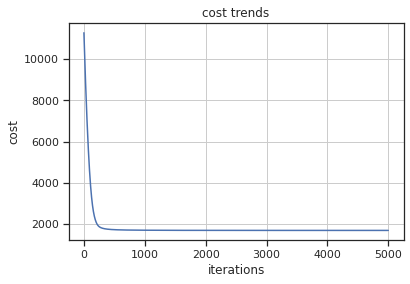

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:21<00:00, 233.25it/s]


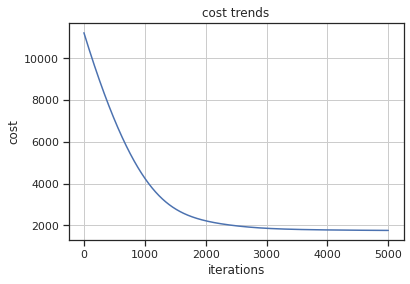

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 289.33it/s]


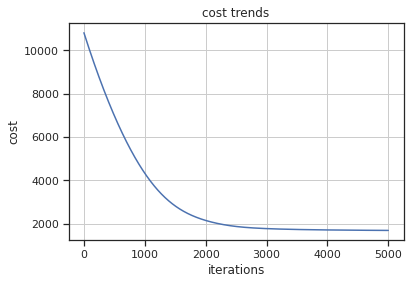

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 281.44it/s]


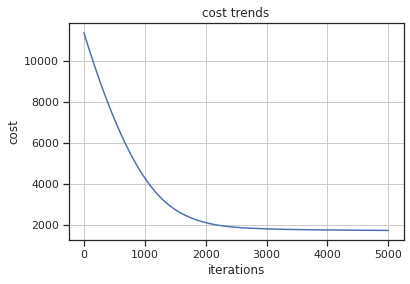

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 285.90it/s]


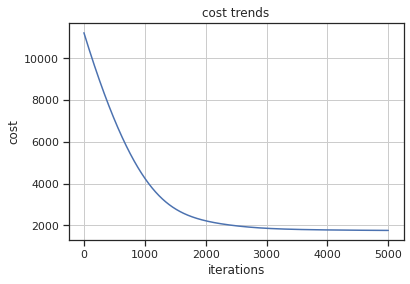

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:19<00:00, 262.80it/s]


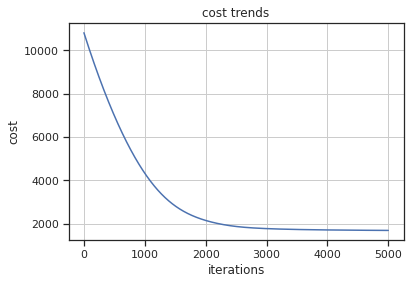

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 282.19it/s]


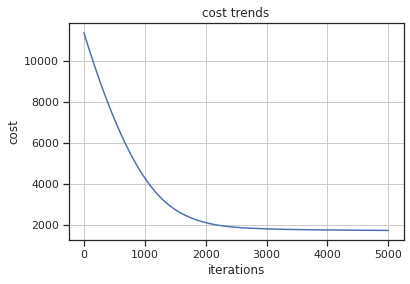

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 282.08it/s]


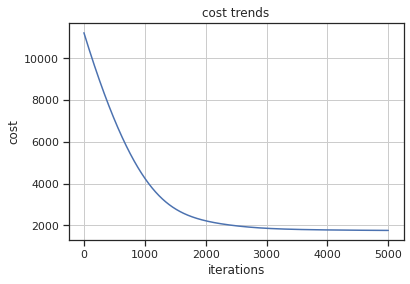

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 287.74it/s]


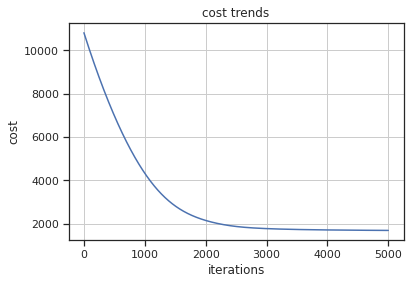

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 280.51it/s]


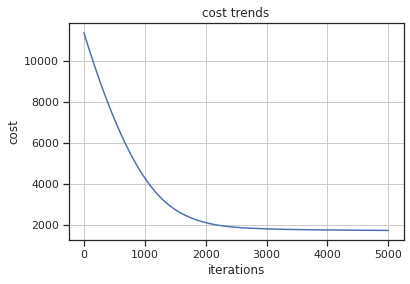

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 279.55it/s]


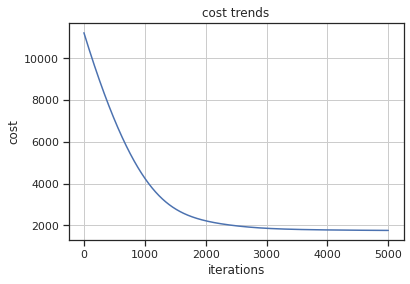

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 285.11it/s]


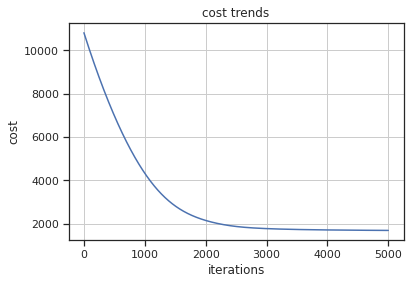

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 5000/5000 [00:17<00:00, 277.88it/s]


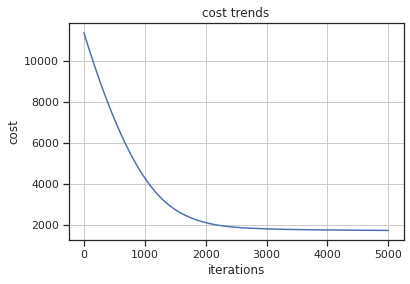

[0.269, 0.27, 0.259]

 F1  0.266


  1%|          | 79/10000 [00:00<00:36, 274.62it/s]


The model stopped learning


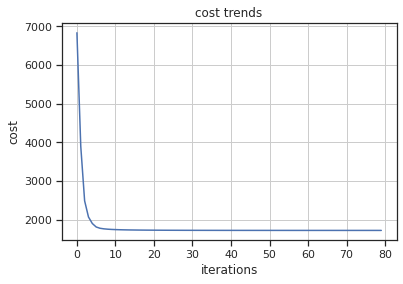

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  1%|          | 78/10000 [00:00<00:37, 266.89it/s]


The model stopped learning


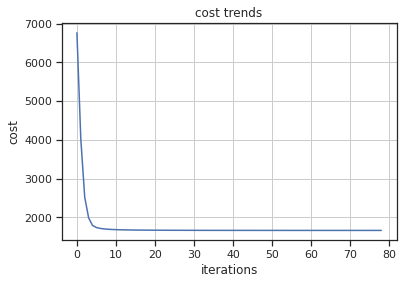

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  1%|          | 89/10000 [00:00<00:37, 264.48it/s]


The model stopped learning


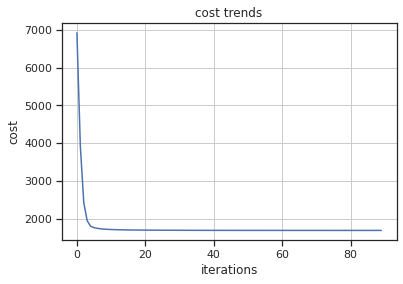

[0.269, 0.27, 0.259]

 F1  0.266


  1%|          | 114/10000 [00:00<00:37, 265.29it/s]


The model stopped learning


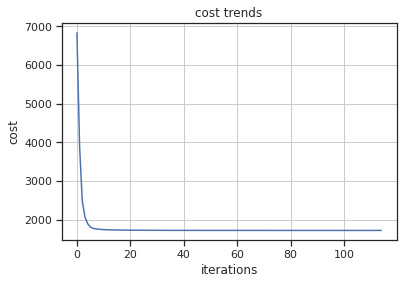

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  1%|          | 111/10000 [00:00<00:36, 268.62it/s]


The model stopped learning


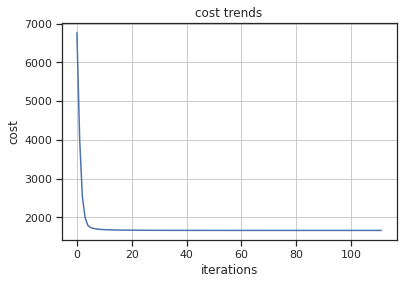

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  1%|▏         | 128/10000 [00:00<00:37, 265.55it/s]


The model stopped learning


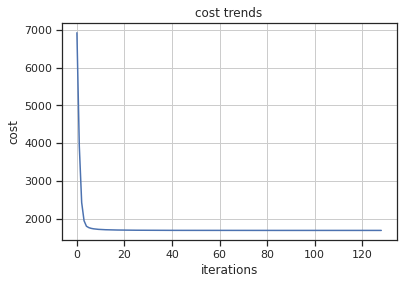

[0.269, 0.27, 0.259]

 F1  0.266


  1%|▏         | 149/10000 [00:00<00:37, 261.13it/s]


The model stopped learning


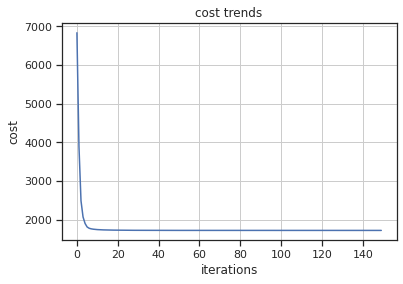

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  1%|▏         | 146/10000 [00:00<00:40, 243.08it/s]


The model stopped learning


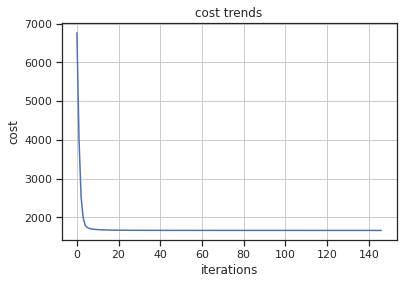

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 168/10000 [00:01<01:04, 153.51it/s]


The model stopped learning


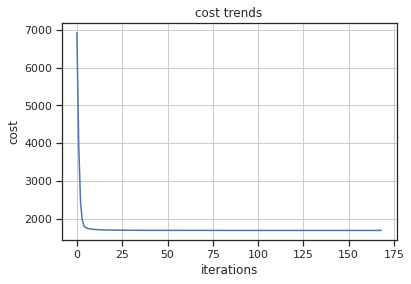

[0.269, 0.27, 0.259]

 F1  0.266


100%|██████████| 10000/10000 [00:36<00:00, 271.75it/s]


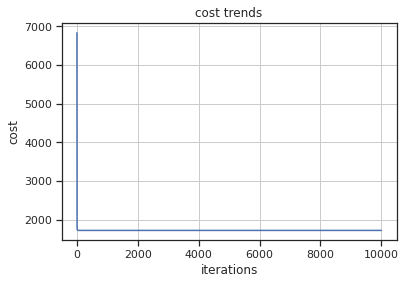

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:36<00:00, 275.83it/s]


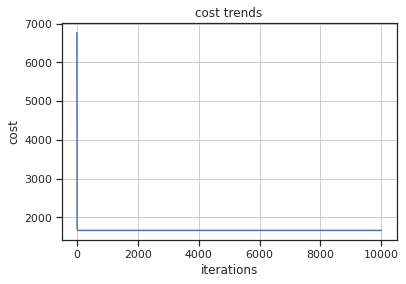

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:36<00:00, 270.40it/s]


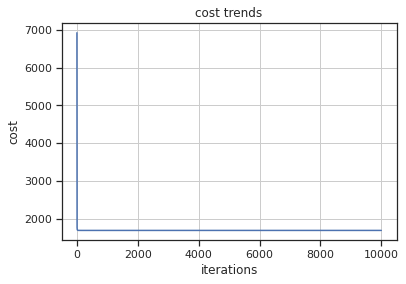

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 15%|█▌        | 1515/10000 [00:05<00:31, 271.01it/s]


The model stopped learning


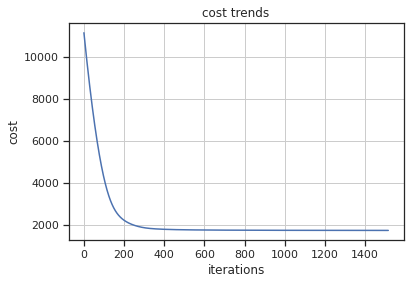

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 15%|█▍        | 1474/10000 [00:05<00:31, 266.75it/s]


The model stopped learning


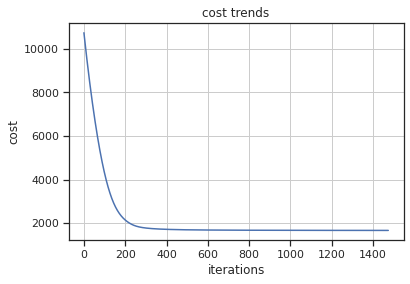

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 16%|█▋        | 1639/10000 [00:06<00:31, 262.42it/s]


The model stopped learning


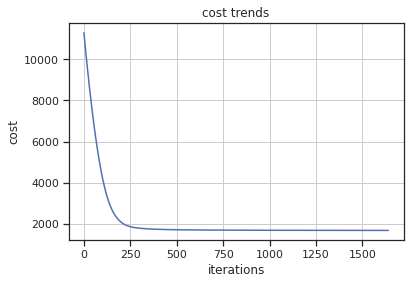

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 29%|██▉       | 2925/10000 [00:11<00:27, 261.35it/s]


The model stopped learning


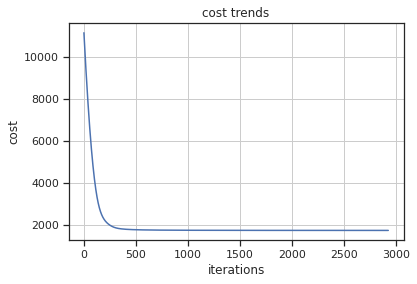

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 29%|██▊       | 2858/10000 [00:12<00:31, 229.75it/s]


The model stopped learning


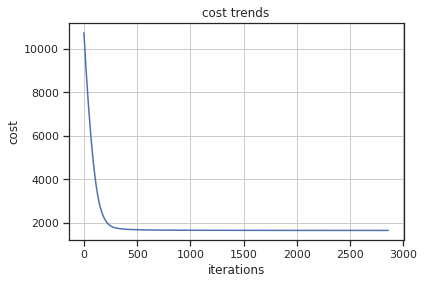

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 32%|███▏      | 3235/10000 [00:12<00:25, 264.08it/s]


The model stopped learning


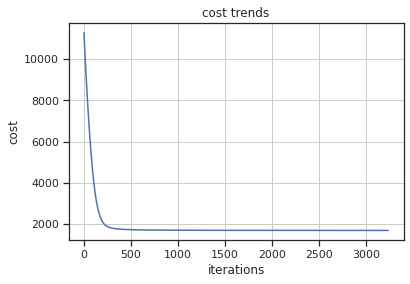

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 46%|████▌     | 4599/10000 [00:17<00:20, 267.69it/s]


The model stopped learning


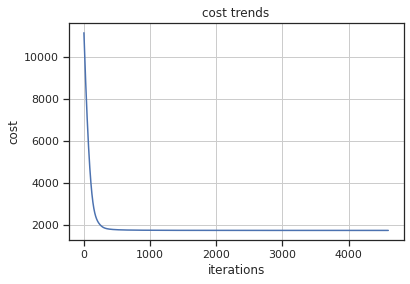

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 45%|████▍     | 4493/10000 [00:16<00:19, 275.40it/s]


The model stopped learning


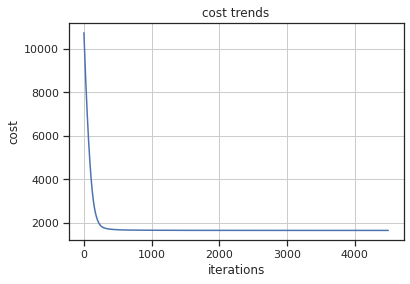

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 51%|█████▏    | 5130/10000 [00:19<00:18, 263.46it/s]


The model stopped learning


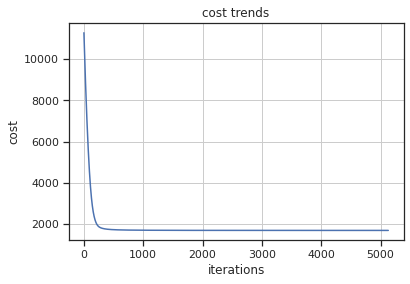

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:37<00:00, 264.50it/s]


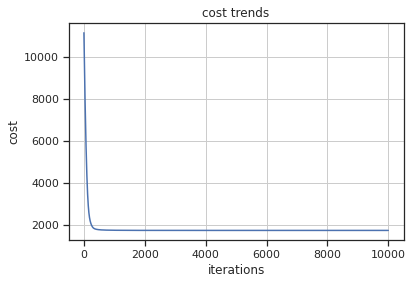

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:37<00:00, 264.40it/s]


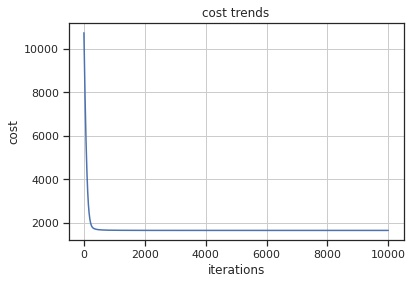

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:40<00:00, 246.85it/s]


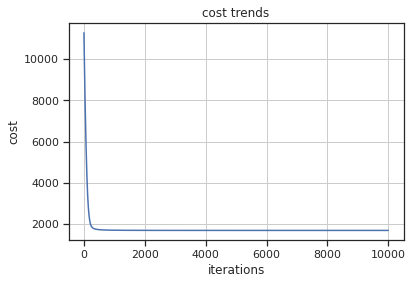

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 69%|██████▉   | 6881/10000 [00:26<00:12, 259.13it/s]


The model stopped learning


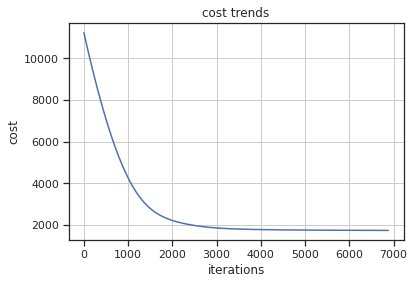

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 68%|██████▊   | 6759/10000 [00:26<00:12, 257.51it/s]


The model stopped learning


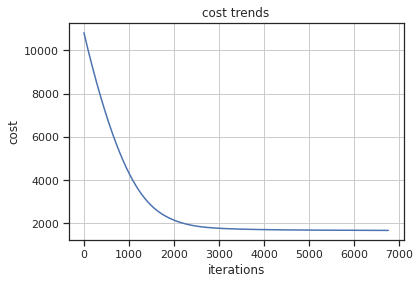

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 70%|██████▉   | 6998/10000 [00:26<00:11, 261.18it/s]


The model stopped learning


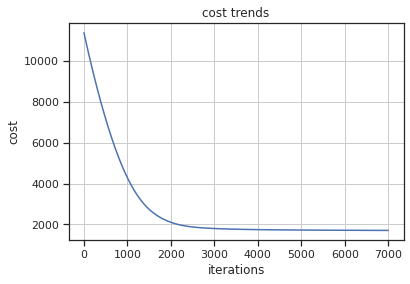

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:39<00:00, 251.26it/s]


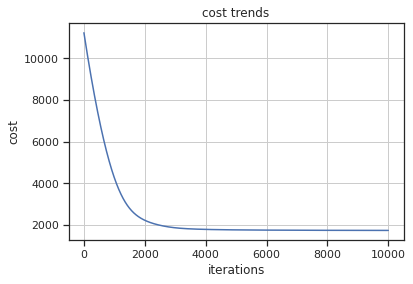

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:38<00:00, 262.53it/s]


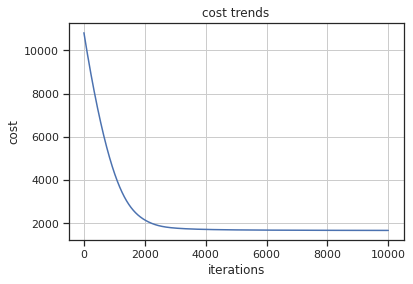

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:38<00:00, 256.45it/s]


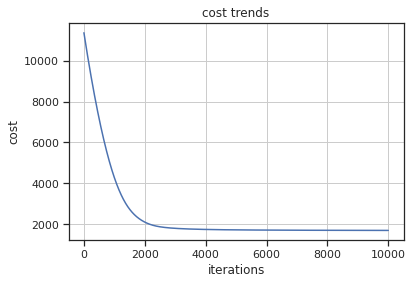

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:41<00:00, 239.42it/s]


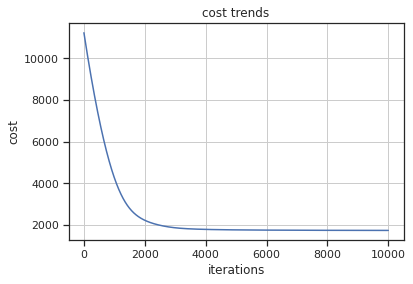

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:40<00:00, 244.48it/s]


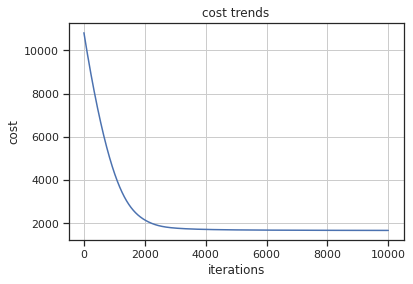

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:39<00:00, 251.29it/s]


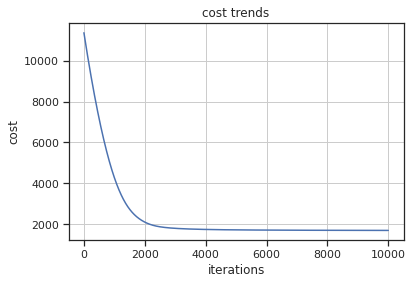

[0.269, 0.27, 0.259]

 F1  0.266


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:39<00:00, 252.79it/s]


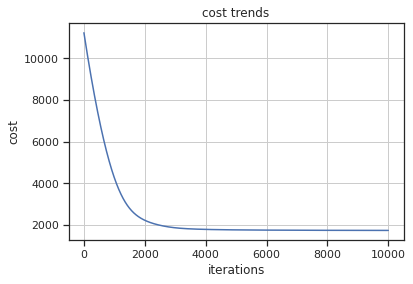

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:39<00:00, 254.36it/s]


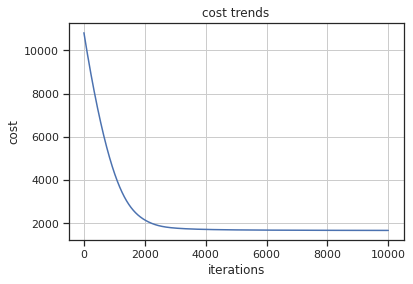

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:41<00:00, 238.84it/s]


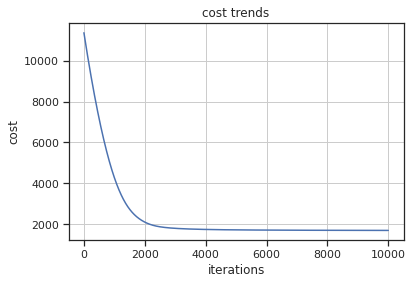

[0.269, 0.27, 0.259]

 F1  0.266
(5000, 0.0005, 0.005)
0


In [ ]:
# Gridsearch to find best parameters


maxiterations = [5000, 10000]
lr = [0.0005, 0.00001, 0.000001]
epsilon = [0.005, 0.0005, 0.00005, 0]
hyperparameters_lr = list(itertools.product(*[maxiterations,lr,epsilon]))
f1_scores_lr = []

for maxit, lr, eps in hyperparameters_lr:
  lr = LogisticRegression(maxIteration = maxit, learningRate = lr, epsilon = eps, train_X = X_train, test_X = X_test, train_y = y_train, test_y = y_test,  k = 3)
  f1= lr.kfold_fit() # k = 3
  print("\n F1 \b", f1)
  f1_scores_lr.append(f1)

print(hyperparameters_lr[np.argmax(f1_scores_lr)])
print(np.argmax(f1_scores_lr))

#time taken to run this cell - 20 mins 15 seconds

In [ ]:
#print(hyperparameters[np.argmax(f1_scores)])
print(np.argmax(f1_scores_lr), np.max(f1_scores_lr))


0 0.266


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  1%|          | 62/5000 [00:00<00:49, 100.63it/s]


The model stopped learning


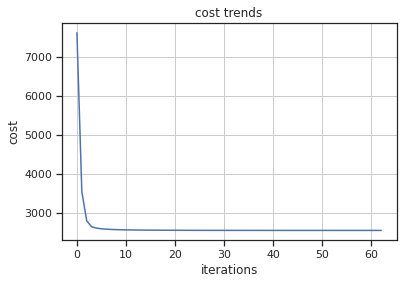

The TRAINING f1-score was 0.493 and precision was 0.742 and recall was 0.369
The TESTING f1-score was 0.488 and precision was 0.773 and recall was 0.356
W: [-2.23321118 -0.02776004  0.00971166  0.02991902  0.03189348  0.21835772
 -0.80710291  1.55663608 -0.07362451 -0.08287711  0.06304233 -0.04586492
  0.00729347  0.0736894   0.32548554 -0.09785831 -0.12560482]


In [ ]:
# Best model: train and get test results


maxit, learnrate, eps = hyperparameters_lr[np.argmax(f1_scores_lr)]
lr_best = LogisticRegression(maxIteration = maxit, learningRate = learnrate, epsilon = eps, train_X = X_train, test_X = X_test, train_y = y_train, test_y = y_test)
y_pred, y_hat_test_proba = lr_best.fit()


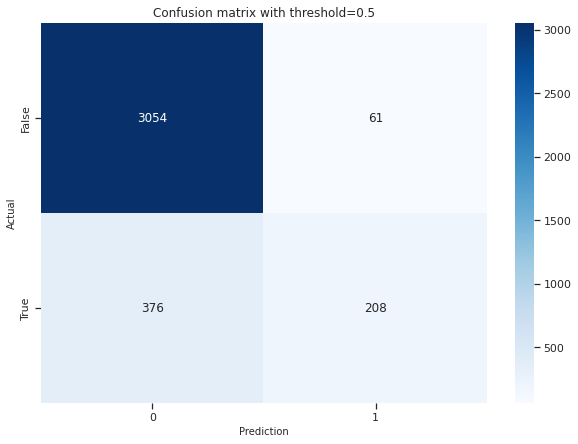

In [ ]:
# Confusion matrix
lr_best.confusion_matrix(y_test, y_hat_test_proba)

# 3007, 70, 408, 214

Best Threshold=0.152967, G-Mean=0.805


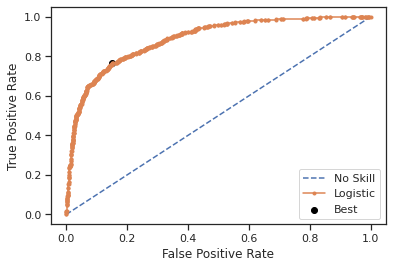

In [ ]:
# ROC curve to find a good threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_proba)
# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

(0.595, 0.487, 0.764)


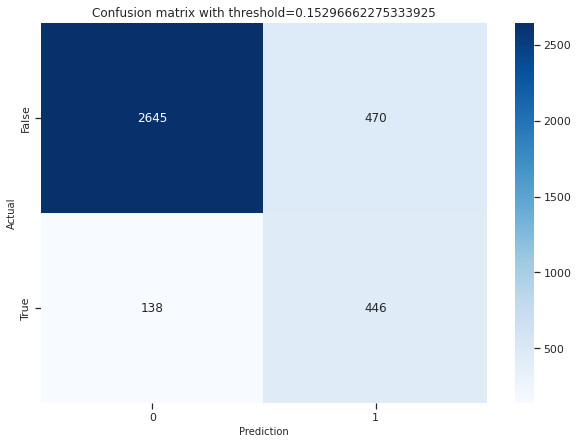

In [ ]:
print(lr_best.evaluate(y_test, y_hat_test_proba, thresholds[ix]))
lr_best.confusion_matrix(y_test, y_hat_test_proba, thresholds[ix])

In [ ]:
# With new threshold
f1, prec, rec = lr_best.evaluate(y_test, y_hat_test_proba, threshold = thresholds[ix])
print("The TESTING f1-score was {} and precision was {} and recall was {}".format(f1, prec, rec))
# 0.577

The TESTING f1-score was 0.595 and precision was 0.487 and recall was 0.764


#### Balanced Dataset


SMOTE

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 95%|█████████▍| 9488/10000 [00:51<00:02, 185.83it/s]


The model stopped learning


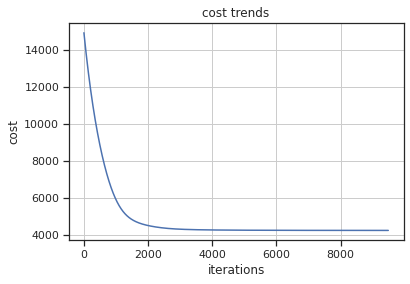

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 95%|█████████▍| 9470/10000 [00:51<00:02, 184.44it/s]


The model stopped learning


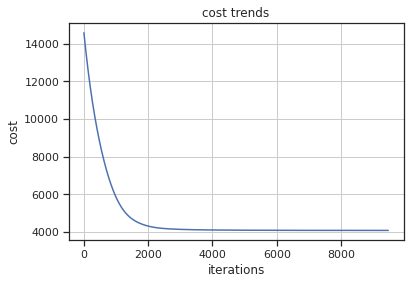

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:53<00:00, 187.04it/s]


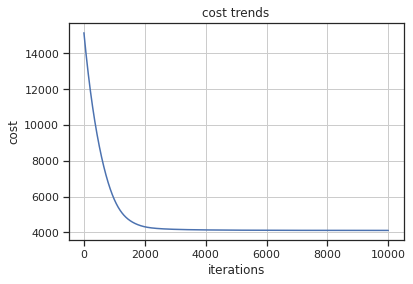

[0.666, 0.662, 0.671]

 F1  0.6663333333333333


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:53<00:00, 185.79it/s]


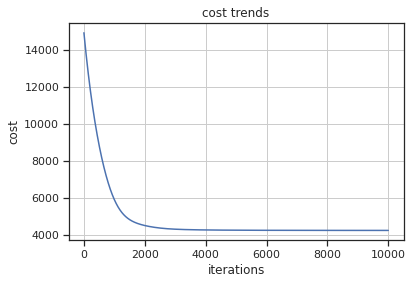

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:52<00:00, 188.84it/s]


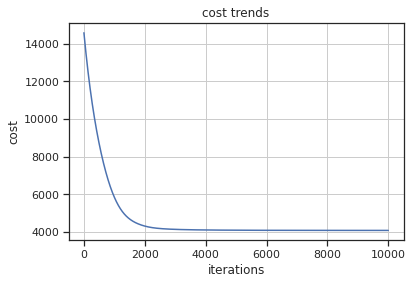

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:54<00:00, 184.41it/s]


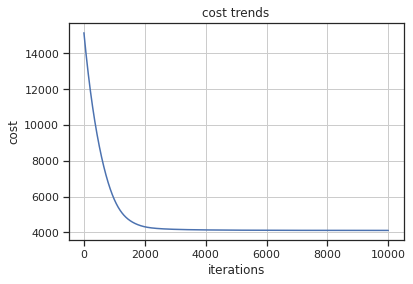

[0.666, 0.662, 0.671]

 F1  0.6663333333333333


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 25%|██▌       | 2515/10000 [00:13<00:40, 183.15it/s]


The model stopped learning


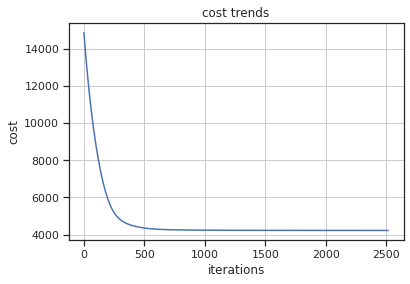

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 25%|██▌       | 2513/10000 [00:14<00:42, 176.42it/s]


The model stopped learning


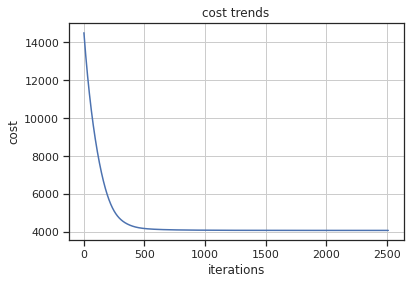

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 28%|██▊       | 2789/10000 [00:16<00:43, 164.08it/s]


The model stopped learning


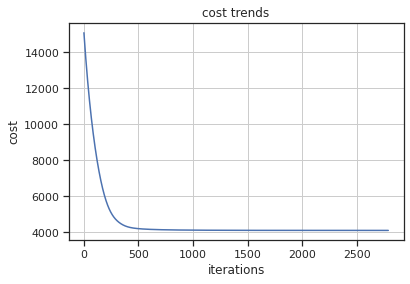

[0.666, 0.662, 0.671]

 F1  0.6663333333333333


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 35%|███▍      | 3459/10000 [00:20<00:38, 168.13it/s]


The model stopped learning


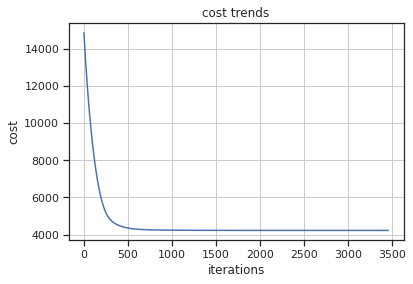

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 34%|███▍      | 3447/10000 [00:20<00:38, 170.75it/s]


The model stopped learning


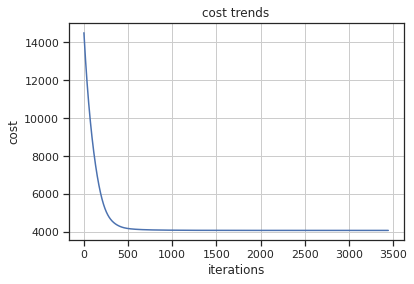

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 39%|███▉      | 3890/10000 [00:20<00:32, 189.96it/s]


The model stopped learning


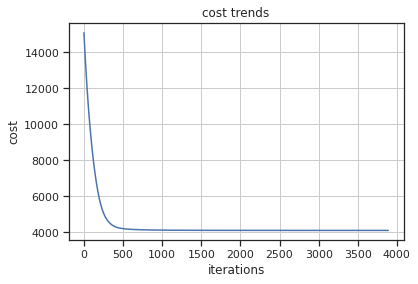

[0.666, 0.662, 0.671]

 F1  0.6663333333333333


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:55<00:00, 179.01it/s]


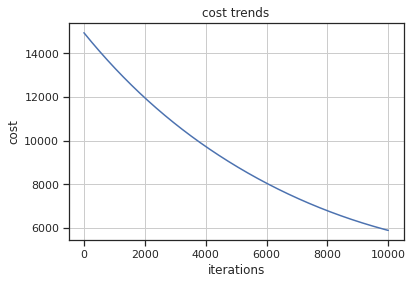

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [01:04<00:00, 155.35it/s]


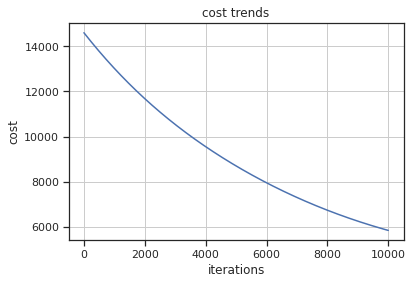

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [01:08<00:00, 145.52it/s]


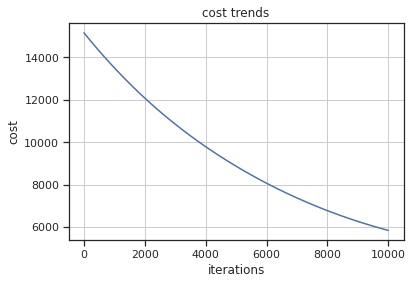

[0.666, 0.662, 0.671]

 F1  0.6663333333333333


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [01:15<00:00, 131.98it/s]


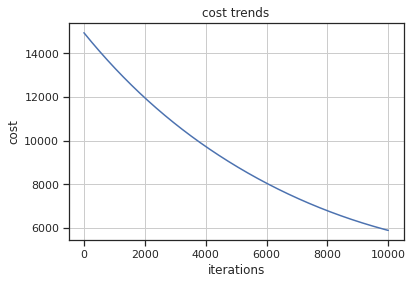

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:54<00:00, 183.58it/s]


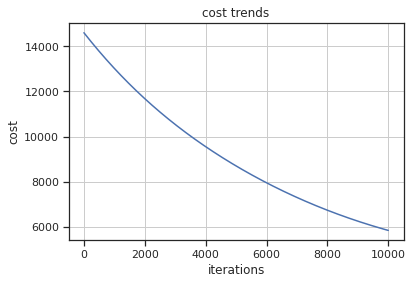

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:56<00:00, 177.68it/s]


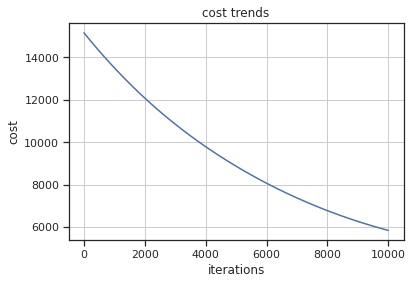

[0.666, 0.662, 0.671]

 F1  0.6663333333333333
(10000, 1e-06, 0.0005)
0


In [ ]:
# With smote


maxiterations = [10000]
lr_list = [0.000001, 0.000005, 0.0000001]
epsilon = [0.0005, 0.00005]
hyperparameters_lr_smote = list(itertools.product(*[maxiterations,lr_list,epsilon]))
f1_scores_lr_smote = []

for maxit, lr_v, eps in hyperparameters_lr_smote:
  lr_smote = LogisticRegression(maxIteration = maxit, learningRate = lr_v, epsilon = eps, train_X = X_train_smote, test_X = X_test, train_y = y_train_smote, test_y = y_test,  k = 3)
  f1= lr_smote.kfold_fit() # k = 3
  print("\n F1 \b", f1)
  f1_scores_lr_smote.append(f1)

print(hyperparameters_lr_smote[np.argmax(f1_scores_lr_smote)])
print(np.argmax(f1_scores_lr_smote))

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 76%|███████▌  | 7556/10000 [01:18<00:25, 96.73it/s] 


The model stopped learning


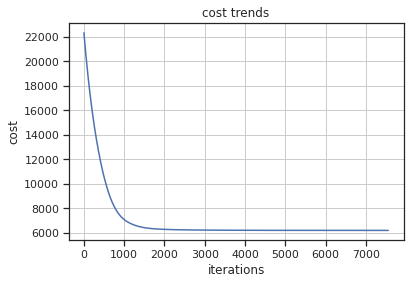

The TRAINING f1-score was 0.818 and precision was 0.878 and recall was 0.766
The TESTING f1-score was 0.623 and precision was 0.546 and recall was 0.724
W: [-0.5915636   0.0238448  -0.00781898  0.03683436  0.0105195   0.25553135
 -0.68282735  2.50492611 -0.09588655 -0.05563742  0.00960011 -0.11232989
 -0.04651375  0.0679467   0.50374092 -0.10865608 -0.11025284]


In [ ]:
# Best model: 


maxit, learnrate, eps = hyperparameters_lr_smote[np.argmax(f1_scores_lr_smote)]
lr_smote = LogisticRegression(maxIteration = maxit, learningRate = learnrate, epsilon = eps, train_X = X_train_smote, test_X = X_test, train_y = y_train_smote, test_y = y_test)
y_pred, y_hat_test_proba = lr_smote.fit()


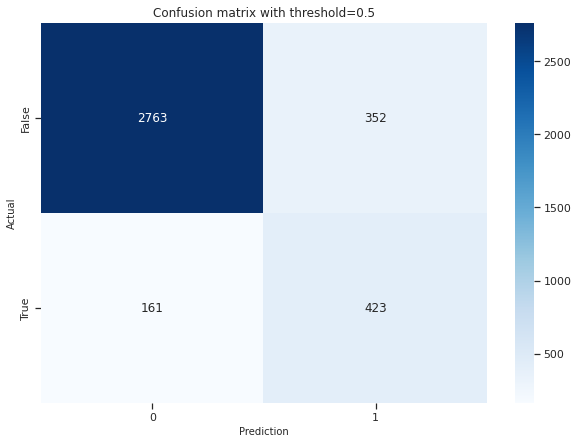

In [ ]:
lr_smote.confusion_matrix(y_test, y_hat_test_proba)

Best Threshold=0.444817, G-Mean=0.810


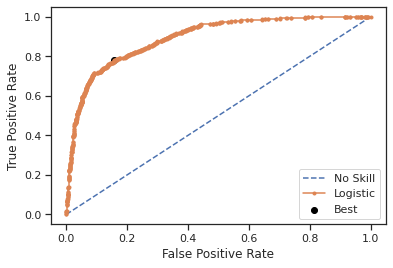

In [ ]:
# ROC curve to find a good threshold
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_proba)
# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

(0.594, 0.48, 0.779)


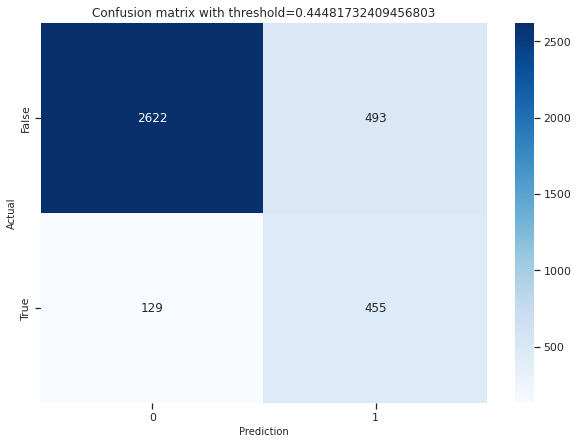

In [ ]:
print(lr_smote.evaluate(y_test, y_hat_test_proba, thresholds[ix]))
lr_smote.confusion_matrix(y_test, y_hat_test_proba, thresholds[ix])

In [ ]:
a_smote,b_smote,c_smote = list(map(list, zip(*hyperparameters_lr_smote)))
smote_dummy = ['original'] * len(f1_scores_lr) + ['smote'] * len(f1_scores_lr_smote)
a,b,c = list(map(list, zip(*hyperparameters_lr)))
df = pd.DataFrame(list(zip(smote_dummy, a+a_smote, b+b_smote, c+c_smote, f1_scores_lr+f1_scores_lr_smote)),
               columns =["typedata", 'maxiterations', 'learningrate', 'epsilon','f1_score'])
print("K-fold results")
df

K-fold results


,typedata,maxiterations,learningrate,epsilon,f1_score
0,original,5000,5.000000e-04,0.00500,0.266000
1,original,5000,5.000000e-04,0.00050,0.266000
2,original,5000,5.000000e-04,0.00005,0.266000
3,original,5000,5.000000e-04,0.00000,0.266000
4,original,5000,1.000000e-05,0.00500,0.266000
5,original,5000,1.000000e-05,0.00050,0.266000
6,original,5000,1.000000e-05,0.00005,0.266000
7,original,5000,1.000000e-05,0.00000,0.266000
8,original,5000,1.000000e-06,0.00500,0.266000
9,original,5000,1.000000e-06,0.00050,0.266000


In [ ]:
# Final model - best one
print(df[df["f1_score"] == df["f1_score"].max()].iloc[0,:])
#print("Test F1-score:", lr.evaluate(y_test, y_hat_test_proba)[0])


typedata            smote
maxiterations       10000
learningrate     0.000001
epsilon            0.0005
f1_score         0.666333
Name: 24, dtype: object


Undersampled

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:28<00:00, 347.10it/s]


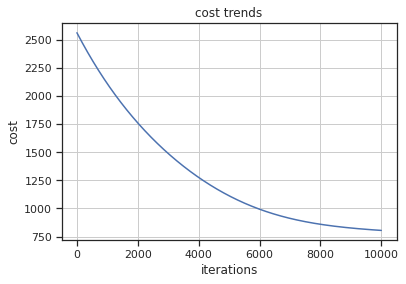

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:19<00:00, 505.54it/s]


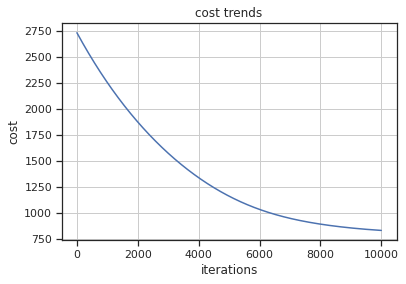

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:19<00:00, 510.27it/s]


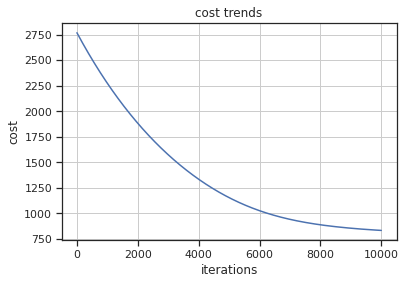

[0.659, 0.67, 0.671]

 F1  0.6666666666666666


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:19<00:00, 504.42it/s]


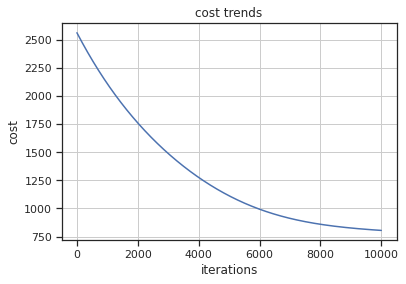

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:19<00:00, 504.35it/s]


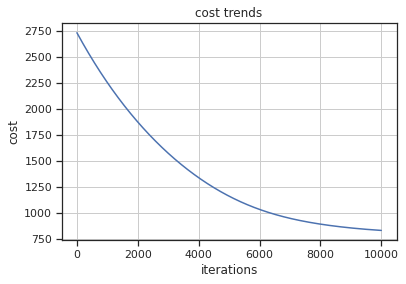

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:22<00:00, 449.34it/s]


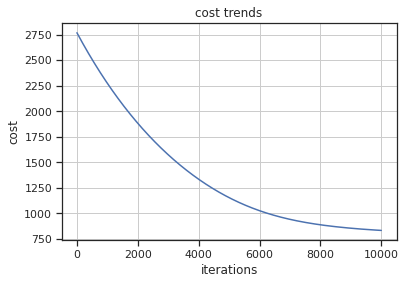

[0.659, 0.67, 0.671]

 F1  0.6666666666666666


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 73%|███████▎  | 7346/10000 [00:14<00:05, 497.00it/s]


The model stopped learning


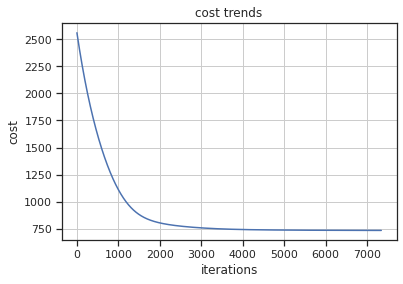

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 68%|██████▊   | 6806/10000 [00:13<00:06, 495.05it/s]


The model stopped learning


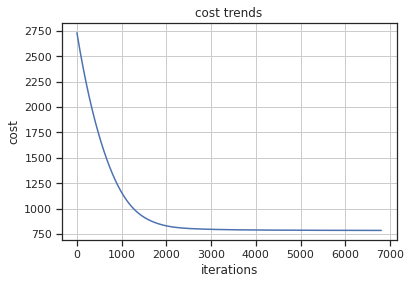

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 58%|█████▊    | 5795/10000 [00:11<00:08, 488.58it/s]


The model stopped learning


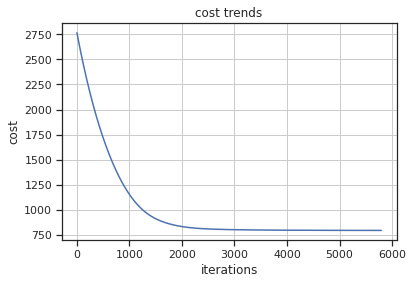

[0.659, 0.67, 0.671]

 F1  0.6666666666666666


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:20<00:00, 493.30it/s]


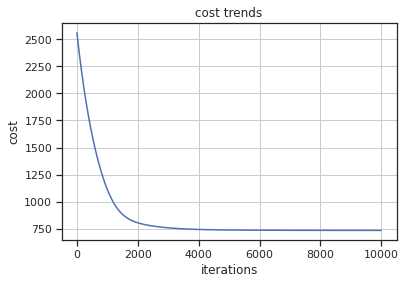

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:19<00:00, 502.34it/s]


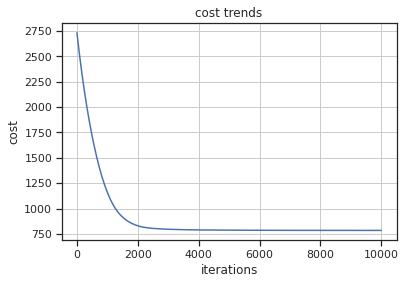

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 93%|█████████▎| 9255/10000 [00:19<00:01, 480.17it/s]


The model stopped learning


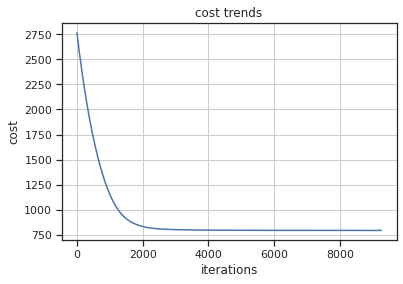

[0.659, 0.67, 0.671]

 F1  0.6666666666666666


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:20<00:00, 480.42it/s]


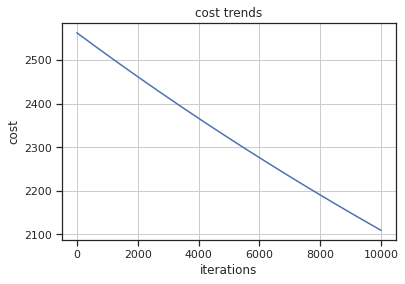

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:22<00:00, 441.33it/s]


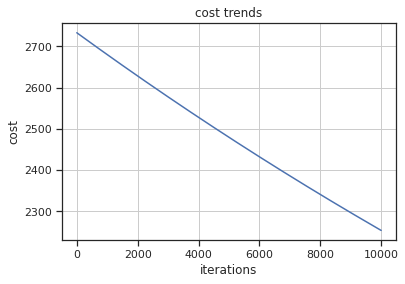

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:21<00:00, 468.75it/s]


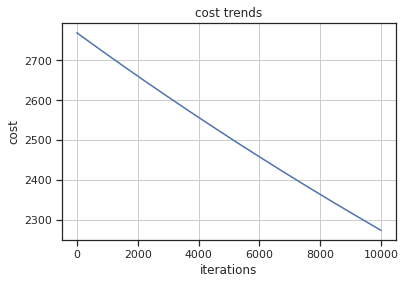

[0.659, 0.67, 0.671]

 F1  0.6666666666666666


  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:21<00:00, 473.70it/s]


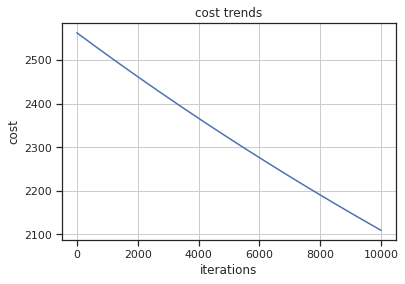

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:21<00:00, 460.54it/s]


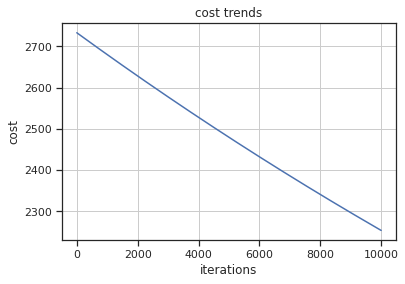

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:21<00:00, 455.91it/s]


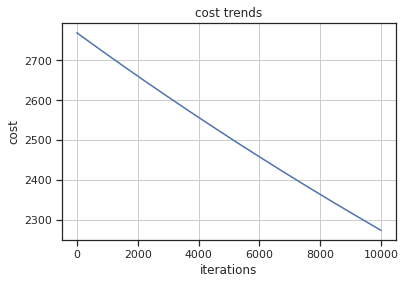

[0.659, 0.67, 0.671]

 F1  0.6666666666666666
(10000, 1e-06, 0.0005)
0


In [ ]:


maxiterations = [10000]
lr_list = [0.000001, 0.000005, 0.0000001]
epsilon = [0.0005, 0.00005]
hyperparameters_lr_under = list(itertools.product(*[maxiterations,lr_list,epsilon]))
f1_scores_lr_under = []

for maxit, lr_v, eps in hyperparameters_lr_under:
  lr_under = LogisticRegression(maxIteration = maxit, learningRate = lr_v, epsilon = eps, 
                                train_X = X_train_under, test_X = X_test, train_y = y_train_under, 
                                test_y = y_test,  k = 3)
  f1= lr_under.kfold_fit() # k = 3
  print("\n F1 \b", f1)
  f1_scores_lr_under.append(f1)

print(hyperparameters_lr_under[np.argmax(f1_scores_lr_under)])
print(np.argmax(f1_scores_lr_under))

#6m 3s

  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
100%|██████████| 10000/10000 [00:24<00:00, 403.39it/s]


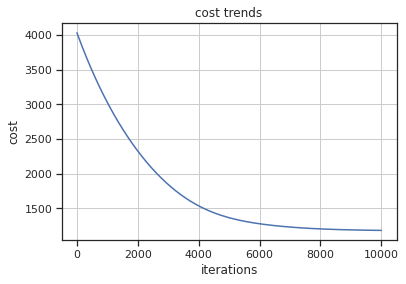

The TRAINING f1-score was 0.795 and precision was 0.859 and recall was 0.739
The TESTING f1-score was 0.603 and precision was 0.513 and recall was 0.731
W: [-0.43289911  0.04948809  0.05683861  0.07218578  0.02736664  0.25771703
 -0.2984012   2.03379462 -0.00837835 -0.12310821  0.00508976 -0.03346006
  0.01621888  0.10792842  0.48847085  0.04889402 -0.14020729]


In [ ]:
# Best model: 
maxit, learnrate, eps = hyperparameters_lr_under[np.argmax(f1_scores_lr_under)]
lr_under = LogisticRegression(maxIteration = maxit, learningRate = learnrate, 
                              epsilon = eps, train_X = X_train_under, 
                              test_X = X_test, train_y = y_train_under, test_y = y_test)
y_pred, y_hat_test_proba = lr_under.fit()

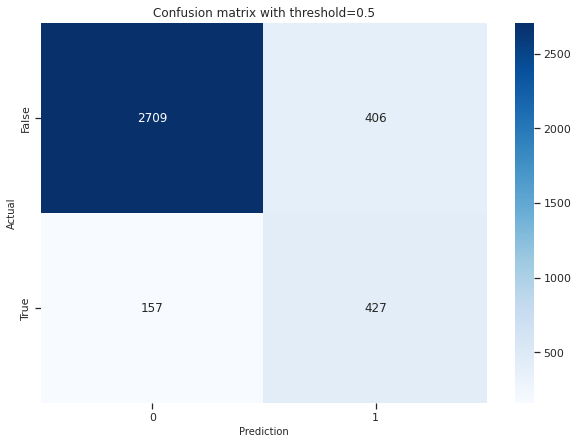

In [ ]:
lr_under.confusion_matrix(y_test, y_hat_test_proba)

Best Threshold=0.446561, G-Mean=0.806


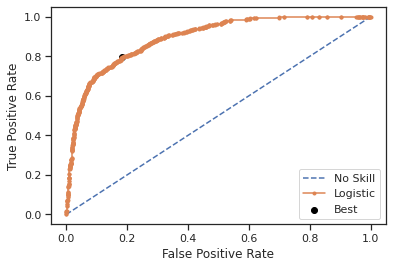

In [ ]:
# ROC curve to find a good threshold
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_proba)
# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

(0.574, 0.45, 0.795)


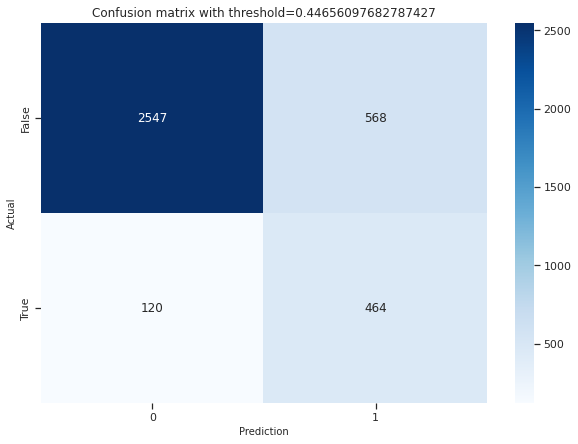

In [ ]:
print(lr_under.evaluate(y_test, y_hat_test_proba, thresholds[ix]))
lr_under.confusion_matrix(y_test, y_hat_test_proba, thresholds[ix])

### 2. Naive Bayes Classifier

In [ ]:


naive_bayes_model = NaiveBayes(train_X = X_train, train_y = y_train, test_X = X_test, test_y = y_test, la_place_smoothing=True, categorical_features= categorical_features)


priors: 0.8465639123884575 0.15343608761154248
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.527690  OperatingSystems_-0.13572607581406873_0
0   0.608108  OperatingSystems_-0.13572607581406873_1
0   0.209900   OperatingSystems_-1.2121785649681136_0
0   0.197447   OperatingSystems_-1.2121785649681136_1
0   0.216054    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.114693            Month_int_1.283952227215025_1
0   0.042925           Month_int_0.6960078540119656_0
0   0.059970           Month_int_0.6960078540119656_1
0   0.024197         Month_int_-0.47988089239415316_0
0   0.017241         Month_int_-0.47988089239415316_1

[124 rows x 2 columns]


In [ ]:
y_pred_test = naive_bayes_model.predict(X_test)

100%|██████████| 3699/3699 [03:39<00:00, 16.87it/s]


In [ ]:
naive_bayes_model.evaluate(y_test, y_pred_test)

(0.53, 0.49, 0.58)

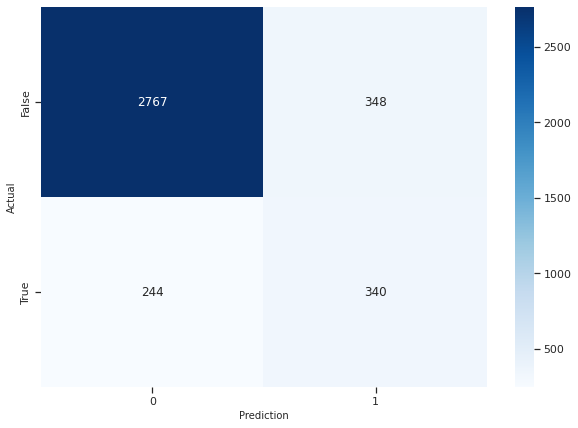

In [ ]:
naive_bayes_model.confusion_matrix(y_test, y_pred_test)
plt.show()

SMOTE

In [ ]:


naive_bayes_model_smote = NaiveBayes(train_X = X_train_smote, train_y = y_train_smote, test_X = X_test, test_y = y_test, la_place_smoothing=True, categorical_features= categorical_features)
y_pred_test = naive_bayes_model_smote.predict(X_test)
print(naive_bayes_model_smote.evaluate(y_test, y_pred_test))
naive_bayes_model_smote.confusion_matrix(y_test, y_pred_test)
plt.show()

priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.430308  OperatingSystems_-0.13572607581406873_0
0   0.445473  OperatingSystems_-0.13572607581406873_1
0   0.171164   OperatingSystems_-1.2121785649681136_0
0   0.102698   OperatingSystems_-1.2121785649681136_1
0   0.176182    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.000190           Month_int_1.0782558472165547_1
0   0.000095           Month_int_1.1347511768703542_0
0   0.000190           Month_int_1.1347511768703542_1
0   0.000095          Month_int_-1.1575475639127255_0
0   0.000190          Month_int_-1.1575475639127255_1

[27480 rows x 2 columns]


 60%|█████▉    | 2201/3699 [05:44<03:50,  6.49it/s]

Undersampled

priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.526276  OperatingSystems_-0.13572607581406873_0
0   0.608108  OperatingSystems_-0.13572607581406873_1
0   0.217718    OperatingSystems_0.9407264133399762_0
0   0.134384    OperatingSystems_0.9407264133399762_1
0   0.203453   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.059970           Month_int_0.6960078540119656_1
0   0.025487         Month_int_-0.47988089239415316_0
0   0.017241         Month_int_-0.47988089239415316_1
0   0.038231          Month_int_0.10806348080890624_0
0   0.040480          Month_int_0.10806348080890624_1

[120 rows x 2 columns]


100%|██████████| 3699/3699 [02:58<00:00, 20.67it/s]


(0.49, 0.37, 0.73)


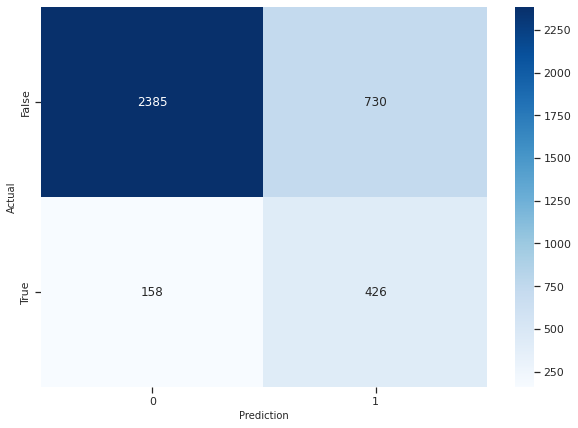

In [ ]:
naive_bayes_model_under = NaiveBayes(train_X = X_train_under, train_y = y_train_under, 
                                     test_X = X_test, test_y = y_test, 
                                     la_place_smoothing=True, categorical_features= categorical_features)
y_pred_test = naive_bayes_model_under.predict(X_test)
print(naive_bayes_model_under.evaluate(y_test, y_pred_test))
naive_bayes_model_under.confusion_matrix(y_test, y_pred_test)
plt.show()

### 3. SVM

In [ ]:
# Use sample - 500  points only (250 each)



sample_df = pd.concat([X_train, y_train], axis=1).groupby("Revenue").sample(n=250, random_state=1)
X_train_sample = sample_df.drop(columns="Revenue").reset_index(drop=True).to_numpy()
y_train_sample_orig = sample_df["Revenue"]
y_train_sample = np.where(y_train_sample_orig == 0, -1, 1)
print(X_train_sample.shape, y_train_sample.shape)

(500, 16) (500,)


In [ ]:
# Hyperparameter Tuning for C



Ct = [0.5, 1, 5, 10, 50, 100]
f1_scores_SVM = []
for i in Ct:
  print(i)
  svm_model = MaxMarginClassifier(C = i, X = X_train_sample, y = y_train_sample, k = 3)
  svm_model.kfold_fit()
  f1 = svm_model.evaluate(X_test, y_test)
  print("f1 for given C = "+ str(i) + " is: " + str(f1))
  print("-----------------------------------------------------------")
  f1_scores_SVM.append(f1[0])


0.5


<ipython-input-31-fcbbbf3300fa>:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if X == "None":
<ipython-input-31-fcbbbf3300fa>:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if y == "None":


[0.857, 0.797, 0.781]
f1 for given C = 0.5 is: (0.582, 0.478, 0.747)
-----------------------------------------------------------
1
[0.852, 0.8, 0.797]
f1 for given C = 1 is: (0.578, 0.472, 0.743)
-----------------------------------------------------------
5
[0.852, 0.812, 0.772]
f1 for given C = 5 is: (0.591, 0.489, 0.745)
-----------------------------------------------------------
10
[0.848, 0.81, 0.772]
f1 for given C = 10 is: (0.592, 0.492, 0.745)
-----------------------------------------------------------
50
[0.852, 0.797, 0.781]
f1 for given C = 50 is: (0.586, 0.485, 0.74)
-----------------------------------------------------------
100
[0.8, 0.782, 0.779]
f1 for given C = 100 is: (0.57, 0.462, 0.745)
-----------------------------------------------------------


In [ ]:
best_C = Ct[np.argmax(f1_scores_SVM)]
svm_model = MaxMarginClassifier(C = best_C, X = X_train_sample, y = y_train_sample, k = 1 )
svm_model.fit()
svm_model.evaluate(X_test, y_test)

(0.632, 0.539, 0.764)

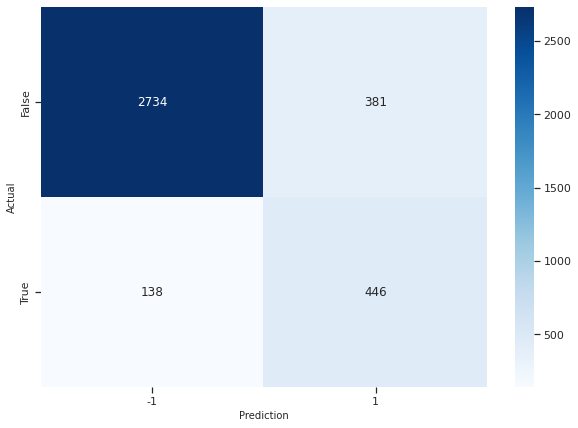

In [ ]:
y_pred = svm_model.predict(X_test)
svm_model.confusion_matrix(y_test, y_pred)

### Bias Variance Tradeoff

#### Bias variance function

In [ ]:
def calculate_variance_of_model(samplePredictions, y_test):
    predictions_mean_model = samplePredictions.mean(axis =1)
    colNames = samplePredictions.columns
    variance = np.zeros(len(colNames))
    i = 0
    for colName in colNames:
        variance[i] = np.mean(np.square(samplePredictions[colName] - predictions_mean_model))
        rmse = mean_squared_error(y_test, samplePredictions[colName])
        i += 1
    return round(np.mean(variance),4), round(np.mean(rmse),4)

def bias_variance(X_train, y_train, X_test, y_test, model_class_name, num_models, num_samples):
  """
  Calculate bias and variance based on multiple samples
  """
  # Initiate output 
  bias_variance_result = pd.DataFrame(columns=['bias','variance', 'mse'])
  samplePredictions = pd.DataFrame()

  # Create population model
  if model_class_name == "LR":
    model_pop = lr_best
    y_hat_pop = model_pop.predict(X_test)
  elif model_class_name == "SVM":
    model_pop = svm_model
    y_hat_pop = model_pop.predict(X_test)
  elif model_class_name == "NaiveBayes":
    model_pop = naive_bayes_model
    y_hat_pop = model_pop.predict(X_test)

  # Create models
  for i in range(num_models):
    # Sample
    sample_df = pd.concat([X_train, y_train], axis=1).groupby("Revenue").sample(n=int(num_samples/2))
    X_train_sample = sample_df.drop(columns="Revenue").reset_index(drop=True)#.to_numpy()
    y_train_sample = sample_df["Revenue"].reset_index(drop=True)
    if model_class_name == "SVM":
      X_train_sample = X_train_sample.to_numpy()
      y_train_sample = np.where(y_train_sample == 0, -1, 1)
      y_test_svm = np.where(y_test == 0, -1, 1)
      X_test_svm = X_test.to_numpy()

    # Create model
    if model_class_name == "LR":
      model_sample = LogisticRegression(maxIteration = 5000, 
                      learningRate = 0.0005, 
                      epsilon = 0.0005, 
                      train_X = X_train_sample, 
                      test_X = X_test, 
                      train_y = y_train_sample, 
                      test_y = y_test)
      y_pred, y_hat_test_proba = model_sample.fit()
      samplePredictions["sample"+str(i)] = model_sample.predict(X_test)
    elif model_class_name == "SVM":
      model_sample = MaxMarginClassifier(C=5, X = X_train_sample, y = y_train_sample)  #svm_model = MaxMarginClassifier(C = i, X = X_train_sample, y = y_train_sample, k = 3)
      model_sample.fit()
      samplePredictions["sample"+str(i)] = model_sample.predict(X_test_svm)
    elif model_class_name == "NaiveBayes":
      model_sample = NaiveBayes(train_X = X_train_sample, 
                                     train_y = y_train_sample, 
                                     test_X = X_test, 
                                     test_y = y_test, 
                                     la_place_smoothing=True, 
                                     categorical_features= categorical_features)
      samplePredictions["sample"+str(i)] = model_sample.predict(X_test)
      
  # Calculate values
  if model_class_name == "SVM":
    var_model = calculate_variance_of_model(samplePredictions, y_test_svm)
  else:
    var_model = calculate_variance_of_model(samplePredictions, y_test)
  
  bias_model = np.square((np.abs(samplePredictions.mean(axis=1) -y_hat_pop).mean()))
  s_linear = pd.Series(data={'bias':bias_model, 
                              'variance' : var_model[0], 'mse' : var_model[1]}, name =0)
      
  bias_variance_result = bias_variance_result.append(s_linear)


  return bias_variance_result



Building Model for samples  [25, 50, 100, 500, 1000, 1500, 2000, 2500]
Starts model: LR
Building models with sample size :  25


 63%|██████▎   | 3168/5000 [00:02<00:01, 1149.00it/s]


The model stopped learning


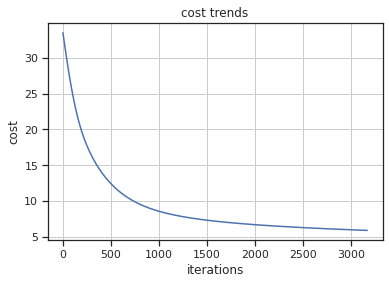

The TRAINING f1-score was 0.917 and precision was 0.917 and recall was 0.917
The TESTING f1-score was 0.425 and precision was 0.292 and recall was 0.781
W: [ 0.49738427 -0.62255135  0.64627084 -0.87518985  0.25892408  0.640168
 -0.61695819  3.0235028   0.70874553  0.32507315  1.4331713   0.1457865
 -0.1622479   0.54342931  0.40706963  1.04578035 -0.29300554]


 80%|████████  | 4015/5000 [00:02<00:00, 1410.63it/s]


The model stopped learning


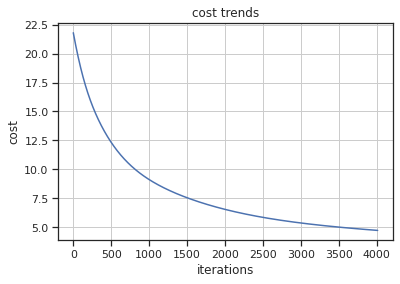

The TRAINING f1-score was 1.0 and precision was 1.0 and recall was 1.0
The TESTING f1-score was 0.499 and precision was 0.353 and recall was 0.851
W: [ 0.54629637 -0.75849319  0.53846743  0.6149743   1.11214862  1.98647792
 -0.03647792  3.65903034  0.01026776  0.38997493 -0.13817145  0.2603933
  0.23890476  0.41301684  0.70322967  1.04132523 -0.71123934]


 47%|████▋     | 2369/5000 [00:01<00:01, 1407.79it/s]


The model stopped learning


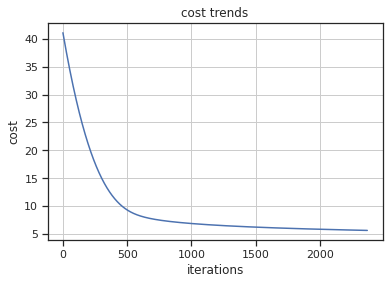

The TRAINING f1-score was 0.909 and precision was 1.0 and recall was 0.833
The TESTING f1-score was 0.397 and precision was 0.265 and recall was 0.791
W: [ 0.58931677  0.64315115 -0.58539389  0.89499131  0.25373662 -0.44930158
  0.01514279  2.61060738 -0.73201963  0.71732377  0.91189737 -0.34535576
  1.15419133  0.704867    0.72232029  1.03740675  0.26635231]


 84%|████████▍ | 4211/5000 [00:02<00:00, 1417.36it/s]


The model stopped learning


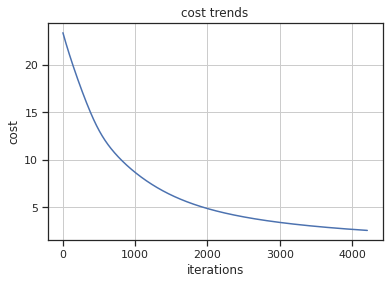

The TRAINING f1-score was 1.0 and precision was 1.0 and recall was 1.0
The TESTING f1-score was 0.387 and precision was 0.255 and recall was 0.807
W: [ 0.37689459  0.38862621 -0.48080429 -2.07605738  0.80157895  0.98392245
 -1.05419835  2.73222845  1.19201375  0.15995263 -0.86011667  0.14152435
  1.12838893 -0.41288343  1.17987224  1.05675506  0.56254059]


 62%|██████▏   | 3098/5000 [00:02<00:01, 1403.90it/s]


The model stopped learning


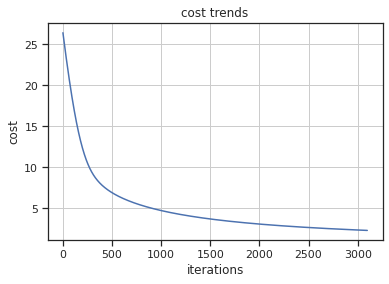

The TRAINING f1-score was 1.0 and precision was 1.0 and recall was 1.0
The TESTING f1-score was 0.428 and precision was 0.288 and recall was 0.836
W: [ 0.788784    0.02316504  0.07006535  1.97490385  1.06269489  1.42754919
 -0.2480807   3.15131353  1.06717113  0.50963699 -1.04191112  0.97431071
  0.66343086  0.39297752  0.94629604  1.01923844 -0.10829801]
Building models with sample size :  50


 57%|█████▋    | 2829/5000 [00:02<00:01, 1378.70it/s]


The model stopped learning


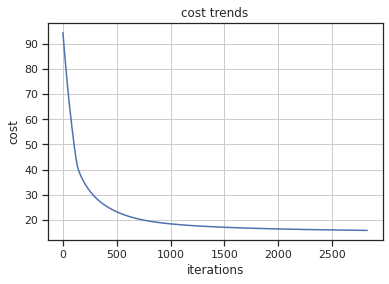

The TRAINING f1-score was 0.833 and precision was 0.87 and recall was 0.8
The TESTING f1-score was 0.364 and precision was 0.25 and recall was 0.668
W: [-0.19953836  0.18377857 -1.42226824  0.09140703 -0.87040345  1.00234751
 -0.05854287  1.44227157 -0.63926339 -1.84809631  0.64579114  0.25951746
  0.56777983  1.23927436 -0.18230495  1.10925899 -0.34486281]


 74%|███████▎  | 3683/5000 [00:02<00:00, 1410.91it/s]


The model stopped learning


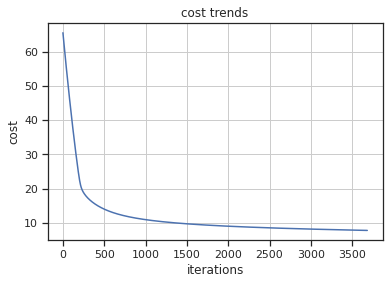

The TRAINING f1-score was 0.96 and precision was 0.96 and recall was 0.96
The TESTING f1-score was 0.49 and precision was 0.362 and recall was 0.76
W: [-0.09917076 -0.38032137  0.21033152  1.23218736  1.68146224  2.31704718
  0.46438451  3.89618023 -0.47369195  0.68477647  0.21096538 -0.12501484
  0.2795664  -0.39757889  0.8710943  -0.59802445  1.0418492 ]


 76%|███████▌  | 3809/5000 [00:02<00:00, 1377.71it/s]


The model stopped learning


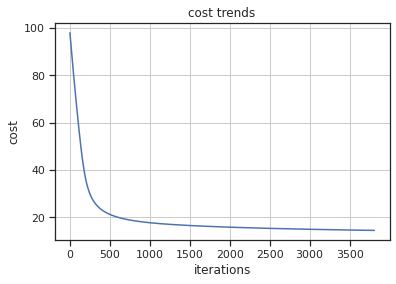

The TRAINING f1-score was 0.875 and precision was 0.913 and recall was 0.84
The TESTING f1-score was 0.417 and precision was 0.308 and recall was 0.644
W: [-0.93193978 -1.01950377  2.92811045 -0.83232484  0.21190837  0.90365421
 -1.36332006  1.15118579  0.43487656 -0.86571053  0.23023209  0.07384156
 -0.92511457  0.94081573  0.3786419  -0.1090135   0.15038099]


 47%|████▋     | 2352/5000 [00:01<00:01, 1382.95it/s]


The model stopped learning


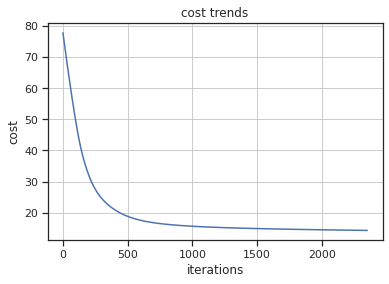

The TRAINING f1-score was 0.863 and precision was 0.846 and recall was 0.88
The TESTING f1-score was 0.507 and precision was 0.383 and recall was 0.748
W: [-0.80921583 -0.06695509  0.30068929 -0.18779239 -0.06914295  0.31031208
 -0.92936581  2.96652513 -0.20097676  0.08650405 -0.12151488  0.14533432
  0.09215488  0.65135002  1.38571267  1.16479097 -0.00498406]


 52%|█████▏    | 2585/5000 [00:01<00:01, 1364.30it/s]


The model stopped learning


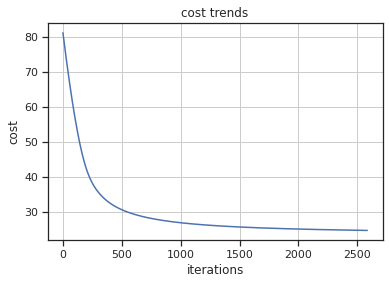

The TRAINING f1-score was 0.8 and precision was 0.8 and recall was 0.8
The TESTING f1-score was 0.443 and precision was 0.305 and recall was 0.808
W: [-0.14463319  0.58123451 -0.24933688 -0.26487766 -0.31567801  0.19550475
 -0.59036455  1.36814416 -0.77746814 -0.13400392  0.49032317  0.13731986
 -0.14816129 -0.51462612  0.19986604  1.10425799  0.07480997]
Building models with sample size :  100


 32%|███▏      | 1624/5000 [00:01<00:02, 1312.12it/s]


The model stopped learning


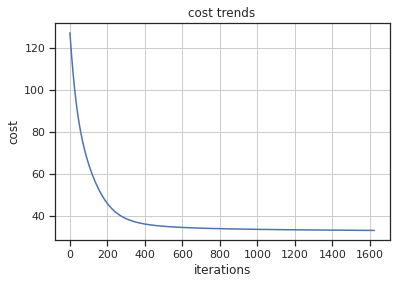

The TRAINING f1-score was 0.86 and precision was 0.86 and recall was 0.86
The TESTING f1-score was 0.475 and precision was 0.356 and recall was 0.714
W: [-0.83064492 -0.3815395   0.79672607  0.42110703  0.25532135 -0.02684608
 -0.72377588  2.21699489  0.16616552 -0.39873603  0.20894486  0.72091431
  0.5892424  -0.21533732  1.51631876  1.16674282 -0.08951999]


 48%|████▊     | 2386/5000 [00:01<00:01, 1322.10it/s]


The model stopped learning


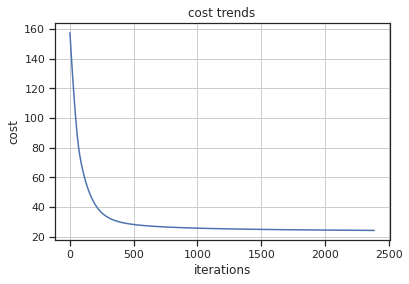

The TRAINING f1-score was 0.9 and precision was 0.9 and recall was 0.9
The TESTING f1-score was 0.595 and precision was 0.529 and recall was 0.68
W: [-1.12799688 -0.36015795  0.09520573  0.27977232 -0.52373909  1.01721909
 -0.55813125  3.9478457   0.24172591 -0.45515576  0.44017483  0.38683926
 -0.51630592  0.0588541   0.64122404  1.19389498 -0.34535531]


 53%|█████▎    | 2659/5000 [00:02<00:01, 1312.48it/s]


The model stopped learning


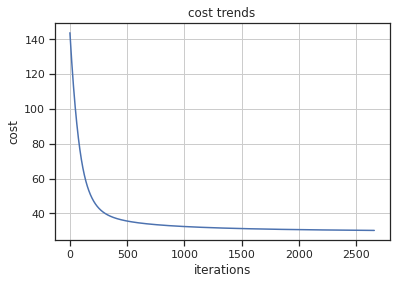

The TRAINING f1-score was 0.872 and precision was 0.932 and recall was 0.82
The TESTING f1-score was 0.597 and precision was 0.499 and recall was 0.743
W: [-0.55571201 -0.43620706  0.94535074  0.02295643  0.05241491  0.439507
 -0.49263339  4.20784874 -0.35722767 -0.26723043 -0.39703586  0.13855264
 -0.60302205 -0.0243859   0.66325405  1.14170078 -0.08987174]


 23%|██▎       | 1166/5000 [00:00<00:02, 1281.70it/s]


The model stopped learning


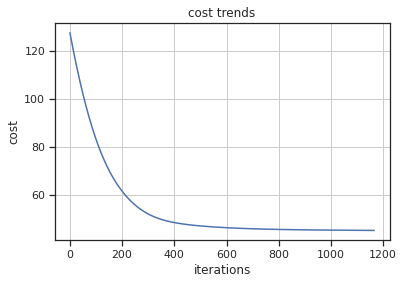

The TRAINING f1-score was 0.808 and precision was 0.816 and recall was 0.8
The TESTING f1-score was 0.434 and precision was 0.317 and recall was 0.69
W: [-0.51692026  0.63334746  0.24674517 -0.51404929 -0.46821226  0.72492025
 -0.73221407  0.85969392  0.34995185  0.23539498 -0.04294965  0.12543575
  0.26202416 -0.09148133  0.57913312  1.13818869 -0.12628659]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 23%|██▎       | 1145/5000 [00:00<00:03, 1224.86it/s]


The model stopped learning


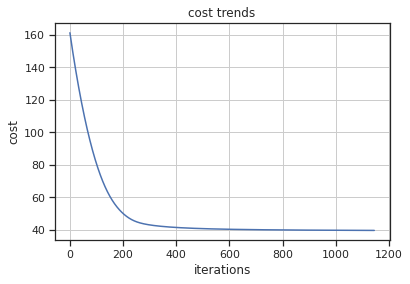

The TRAINING f1-score was 0.86 and precision was 0.93 and recall was 0.8
The TESTING f1-score was 0.557 and precision was 0.463 and recall was 0.699
W: [-0.54909635 -0.22845809  0.05628657  0.37846934  0.41334369 -0.10218194
 -0.8260246   2.00083586 -0.37037883  0.02843483  0.31823827  0.18886042
 -0.26284073 -0.15643834  0.30806567  1.14109966  0.27635179]
Building models with sample size :  500


  2%|▏         | 82/5000 [00:00<00:06, 818.41it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
 18%|█▊        | 913/5000 [00:00<00:03, 1098.68it/s]


The model stopped learning


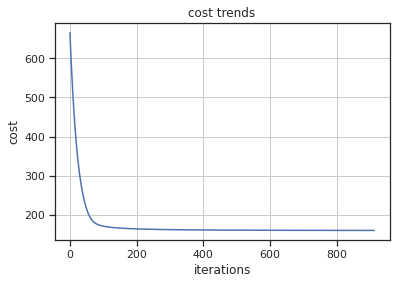

The TRAINING f1-score was 0.858 and precision was 0.896 and recall was 0.824
The TESTING f1-score was 0.591 and precision was 0.486 and recall was 0.755
W: [-0.55425207 -0.16750308 -0.02367463  0.48033667  0.2971589   0.22737629
 -0.56537963  3.84166557 -0.36440592 -0.14127431 -0.09297955  0.11316394
 -0.08288226  0.29536764  0.83130512 -0.01171759 -0.04086069]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  8%|▊         | 394/5000 [00:00<00:04, 1032.46it/s]


The model stopped learning


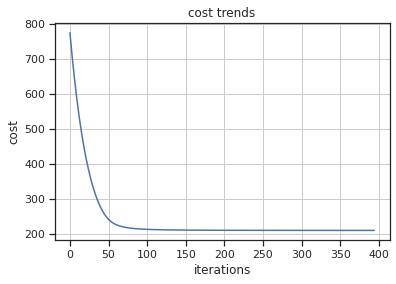

The TRAINING f1-score was 0.8 and precision was 0.865 and recall was 0.744
The TESTING f1-score was 0.563 and precision was 0.446 and recall was 0.764
W: [-0.37096421  0.52475283 -0.33277231 -0.34425441  0.56231823  0.17344769
 -0.41323069  2.4362057  -0.05688254 -0.22206332 -0.03684088 -0.25889577
 -0.00345735 -0.07178783  0.57738363 -0.02080198  0.08303645]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  9%|▉         | 473/5000 [00:00<00:04, 1066.99it/s]


The model stopped learning


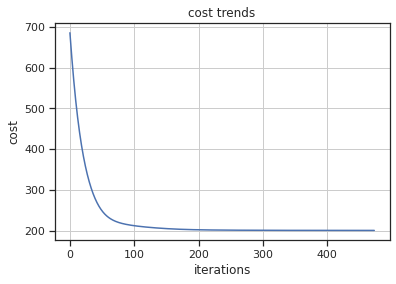

The TRAINING f1-score was 0.815 and precision was 0.869 and recall was 0.768
The TESTING f1-score was 0.602 and precision was 0.503 and recall was 0.75
W: [-0.61955869  0.2965349  -0.18301814  0.0470235   0.11154956  0.30574154
 -0.7296703   2.46616824 -0.22065313 -0.0768184  -0.02116218  0.1270811
 -0.125456   -0.13501464  0.4383217  -0.08732567 -0.06169967]


  9%|▉         | 449/5000 [00:00<00:04, 1056.70it/s]


The model stopped learning


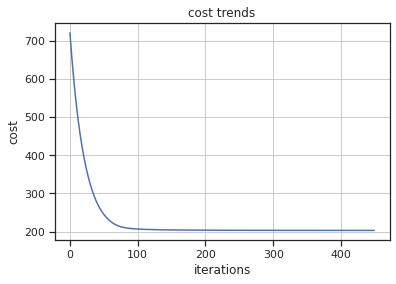

The TRAINING f1-score was 0.815 and precision was 0.883 and recall was 0.756
The TESTING f1-score was 0.597 and precision was 0.494 and recall was 0.753
W: [-0.39323225  0.04685752  0.11292829  0.50236869 -0.43029237  0.25931266
 -0.17184323  2.68997036 -0.19462325  0.02498348  0.11344162 -0.08196205
  0.21704134  0.16270307  0.64373372 -0.29787101 -0.07931445]


  8%|▊         | 409/5000 [00:00<00:04, 1053.82it/s]


The model stopped learning


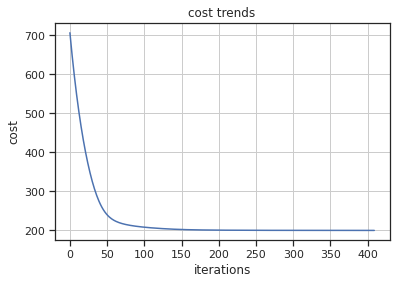

The TRAINING f1-score was 0.834 and precision was 0.88 and recall was 0.792
The TESTING f1-score was 0.617 and precision was 0.536 and recall was 0.728
W: [-0.75606355 -0.02649684 -0.11205415  0.14940617  0.11898736  0.26157227
 -0.78828721  2.36525308 -0.35414258  0.12076676  0.12839332 -0.14568994
  0.02412988  0.14615891  0.37508074  0.08679792  0.22648356]
Building models with sample size :  1000


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  6%|▌         | 310/5000 [00:00<00:07, 629.13it/s]


The model stopped learning


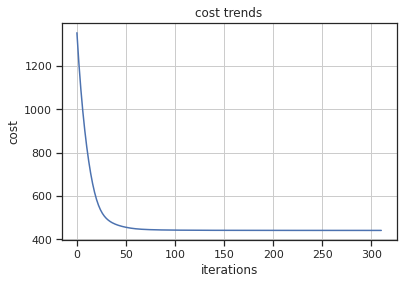

The TRAINING f1-score was 0.79 and precision was 0.84 and recall was 0.746
The TESTING f1-score was 0.583 and precision was 0.483 and recall was 0.735
W: [-0.63650203  0.03507474  0.02303601  0.08268548  0.13748328  0.18915736
 -0.59023194  1.99679404 -0.16868304 -0.07120717  0.14165186 -0.03127758
  0.08353229  0.09695424  0.49561462 -0.34579216 -0.21550023]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  5%|▍         | 242/5000 [00:00<00:08, 563.27it/s]


The model stopped learning


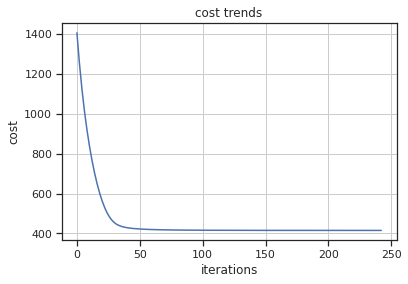

The TRAINING f1-score was 0.812 and precision was 0.873 and recall was 0.758
The TESTING f1-score was 0.598 and precision was 0.504 and recall was 0.736
W: [-6.26198248e-01  1.02190229e-01  1.05217909e-01  8.73416011e-02
 -7.12385775e-02  2.35493308e-01 -6.69253177e-01  2.34031130e+00
 -3.15534060e-02 -6.76656461e-02  3.95411626e-02 -5.09169491e-04
 -2.01629777e-02  8.45404403e-02  4.96227489e-01 -2.81169018e-01
 -2.08948953e-01]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  5%|▌         | 257/5000 [00:00<00:07, 633.95it/s]


The model stopped learning


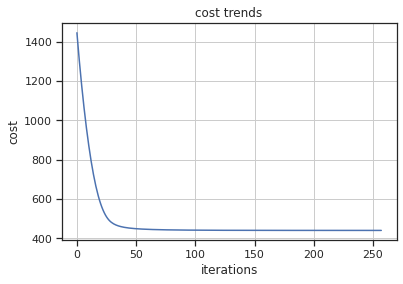

The TRAINING f1-score was 0.807 and precision was 0.869 and recall was 0.754
The TESTING f1-score was 0.607 and precision was 0.505 and recall was 0.76
W: [-0.61912572 -0.05463705  0.01346133  0.05300897  0.17048706  0.36499359
 -0.7648391   2.14104109 -0.08944087 -0.19785589 -0.09084362 -0.09472911
 -0.06057972  0.07985931  0.41815457 -0.39501055 -0.00872998]


  5%|▌         | 261/5000 [00:00<00:07, 605.87it/s]


The model stopped learning


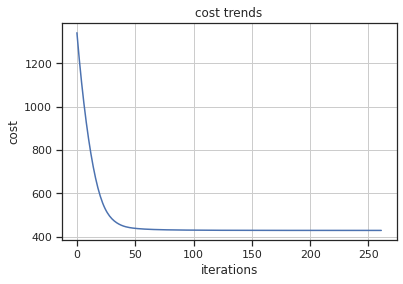

The TRAINING f1-score was 0.816 and precision was 0.862 and recall was 0.774
The TESTING f1-score was 0.606 and precision was 0.502 and recall was 0.765
W: [-0.57754436  0.1360496  -0.04232758  0.03802098 -0.03353039  0.33455278
 -0.79665064  2.26897118 -0.28527606 -0.13879415  0.10379849 -0.08274795
 -0.07628819  0.06216624  0.41797081  0.03719993  0.03585176]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  6%|▌         | 312/5000 [00:00<00:08, 574.31it/s]


The model stopped learning


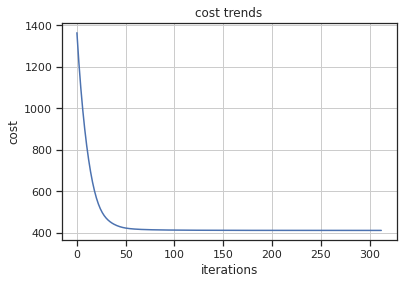

The TRAINING f1-score was 0.812 and precision was 0.87 and recall was 0.762
The TESTING f1-score was 0.597 and precision was 0.492 and recall was 0.759
W: [-0.46178428  0.003938    0.00282481  0.24594484 -0.030638    0.21921017
 -0.68522373  2.71717976 -0.10402483 -0.05629282 -0.01056616 -0.03894873
  0.14677149 -0.02993455  0.4288873  -0.17886869 -0.27500534]
Building models with sample size :  1500


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 157/5000 [00:00<00:09, 506.37it/s]


The model stopped learning


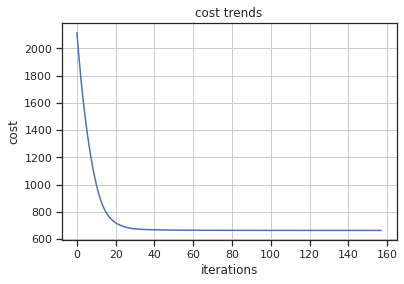

The TRAINING f1-score was 0.795 and precision was 0.845 and recall was 0.751
The TESTING f1-score was 0.603 and precision was 0.506 and recall was 0.747
W: [-0.5938093  -0.00589924  0.06575005  0.10075447 -0.06018279  0.2724676
 -0.69294635  2.14668589 -0.08677217 -0.10739643 -0.03406375 -0.15462645
  0.06427637  0.16699429  0.49909712 -0.0069745  -0.10541212]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  5%|▍         | 239/5000 [00:01<00:29, 164.09it/s]


The model stopped learning


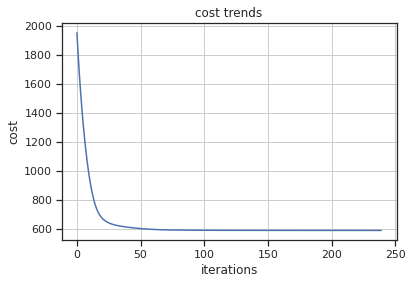

The TRAINING f1-score was 0.819 and precision was 0.866 and recall was 0.776
The TESTING f1-score was 0.615 and precision was 0.523 and recall was 0.747
W: [-0.59153035  0.04462441 -0.01162851  0.13775844 -0.00362698  0.17003977
 -0.80224794  2.8740538  -0.17513628 -0.02584572  0.09992505 -0.11592949
 -0.07849677  0.22233888  0.50888778 -0.06479401 -0.12339743]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 160/5000 [00:00<00:10, 453.88it/s]


The model stopped learning


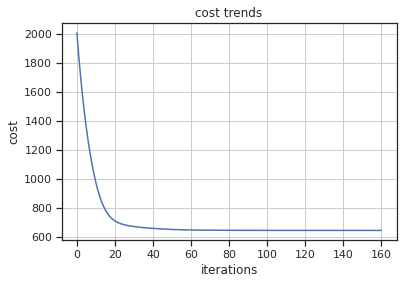

The TRAINING f1-score was 0.793 and precision was 0.855 and recall was 0.74
The TESTING f1-score was 0.629 and precision was 0.557 and recall was 0.724
W: [-6.19663257e-01 -1.98168859e-02 -8.10772030e-03  3.67276389e-03
  9.95076842e-02  2.47869471e-01 -6.30739260e-01  2.38852431e+00
 -7.75590569e-02  1.18606245e-04  1.36320008e-02 -3.15341751e-04
 -9.73609391e-03  4.83099711e-02  5.44154010e-01 -2.43802622e-03
 -1.43283576e-01]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  4%|▍         | 206/5000 [00:00<00:09, 506.28it/s]


The model stopped learning


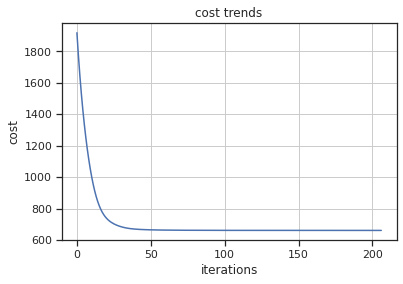

The TRAINING f1-score was 0.797 and precision was 0.872 and recall was 0.733
The TESTING f1-score was 0.615 and precision was 0.53 and recall was 0.735
W: [-0.51753626  0.03010444  0.10383418  0.04093422  0.09723777  0.27167415
 -0.46805573  2.2598223  -0.01758585 -0.08809215  0.13576487 -0.05274002
  0.0446046   0.07827808  0.44539802 -0.30429984 -0.11072157]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 141/5000 [00:00<00:09, 505.53it/s]


The model stopped learning


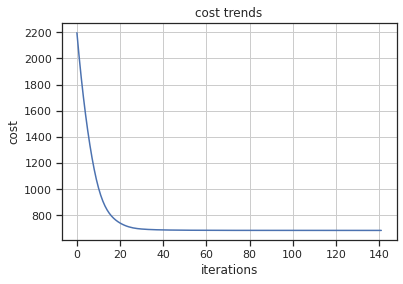

The TRAINING f1-score was 0.775 and precision was 0.849 and recall was 0.713
The TESTING f1-score was 0.61 and precision was 0.531 and recall was 0.716
W: [-5.61662269e-01  9.05872805e-02  1.38804949e-03 -8.20870632e-02
  5.68708175e-03  2.46700717e-01 -5.39328760e-01  2.05345572e+00
 -1.85597930e-01 -4.34826003e-02  4.25014718e-02 -1.76104756e-02
 -7.96198275e-02  6.31867104e-02  4.35841008e-01 -8.57398731e-02
 -1.44140821e-01]
Building models with sample size :  2000


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 148/5000 [00:00<00:10, 454.59it/s]


The model stopped learning


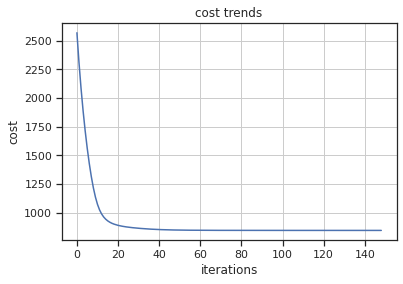

The TRAINING f1-score was 0.8 and precision was 0.872 and recall was 0.739
The TESTING f1-score was 0.608 and precision was 0.52 and recall was 0.733
W: [-0.53534274  0.1307142  -0.01308272  0.12245375 -0.0878994   0.26043856
 -0.53439385  2.53025627 -0.16154338 -0.03812867  0.00631131 -0.00575899
 -0.03467594  0.12528156  0.5394976  -0.0038533  -0.10600604]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 156/5000 [00:00<00:10, 484.30it/s]


The model stopped learning


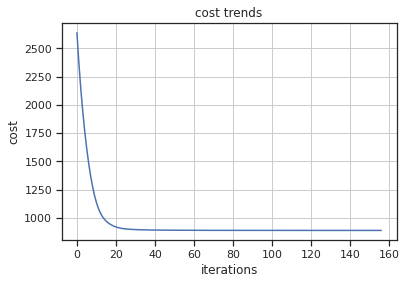

The TRAINING f1-score was 0.801 and precision was 0.86 and recall was 0.75
The TESTING f1-score was 0.612 and precision was 0.522 and recall was 0.74
W: [-0.62763908 -0.01579635 -0.01126521  0.09119211  0.03995182  0.39549298
 -0.71320943  2.00640597 -0.13406786 -0.06458635  0.07549256 -0.05506867
  0.03091569  0.07713799  0.40538178 -0.12855989 -0.11870187]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▎         | 125/5000 [00:00<00:11, 411.90it/s]


The model stopped learning


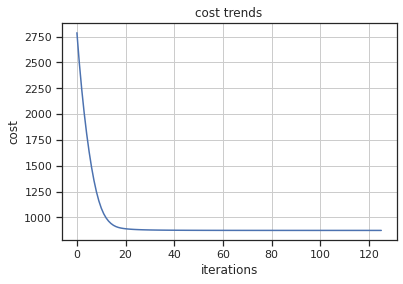

The TRAINING f1-score was 0.802 and precision was 0.868 and recall was 0.745
The TESTING f1-score was 0.618 and precision was 0.533 and recall was 0.736
W: [-0.58508449  0.20959563 -0.06203344  0.0064062   0.02253246  0.18021587
 -0.69777659  2.19220295 -0.02203785 -0.03646103  0.02203088 -0.07428907
 -0.04235211  0.05955387  0.45456507 -0.0894644  -0.07114841]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  5%|▍         | 242/5000 [00:00<00:10, 439.92it/s]


The model stopped learning


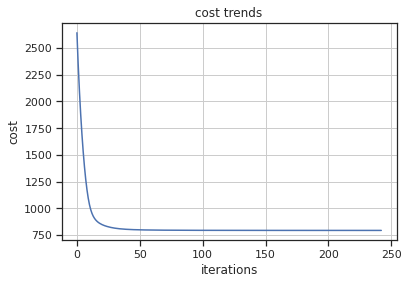

The TRAINING f1-score was 0.818 and precision was 0.892 and recall was 0.755
The TESTING f1-score was 0.629 and precision was 0.549 and recall was 0.736
W: [-0.49755106 -0.04194595  0.07366976  0.15053034 -0.0455359   0.23141746
 -0.56873839  3.10815499 -0.27047021  0.01525578 -0.0227347  -0.07189077
 -0.02318132  0.09330076  0.58445427 -0.04136041 -0.12244794]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  3%|▎         | 174/5000 [00:00<00:11, 435.65it/s]


The model stopped learning


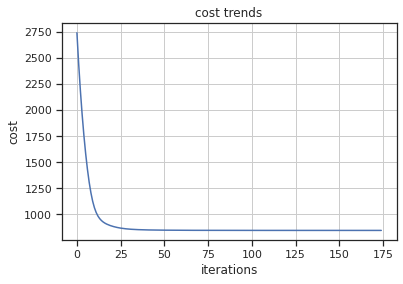

The TRAINING f1-score was 0.799 and precision was 0.88 and recall was 0.732
The TESTING f1-score was 0.633 and precision was 0.562 and recall was 0.724
W: [-0.53119061  0.08757401 -0.02750063  0.03510625 -0.04735231  0.23625496
 -0.58960056  2.71393253 -0.14089098 -0.06475032  0.02262708 -0.04396173
  0.04311374  0.03257251  0.54787242 -0.06266259 -0.06422833]
Building models with sample size :  2500


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 121/5000 [00:00<00:14, 346.55it/s]


The model stopped learning


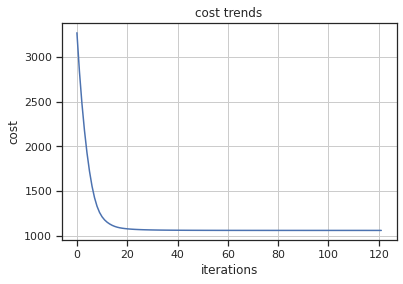

The TRAINING f1-score was 0.809 and precision was 0.871 and recall was 0.756
The TESTING f1-score was 0.614 and precision was 0.531 and recall was 0.729
W: [-5.61674081e-01 -9.43179156e-02  1.31233304e-01  5.40789170e-02
  4.12128924e-02  2.62949883e-01 -6.41085386e-01  2.48526477e+00
 -6.64569792e-02 -1.63791415e-01  8.30422567e-02 -6.17299337e-02
  2.21251809e-03  8.54436407e-02  5.23130949e-01 -6.79210296e-02
 -1.36969439e-01]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 116/5000 [00:00<00:12, 389.34it/s]


The model stopped learning


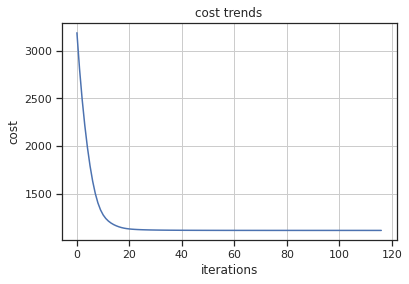

The TRAINING f1-score was 0.791 and precision was 0.85 and recall was 0.739
The TESTING f1-score was 0.603 and precision was 0.507 and recall was 0.743
W: [-0.60455949  0.02868672  0.02298618  0.09992356  0.02485112  0.21942216
 -0.6722081   2.11086324 -0.08372863 -0.03527142  0.00529845 -0.02358802
  0.0101213   0.10040116  0.51586267 -0.13468588 -0.14214918]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 123/5000 [00:00<00:13, 352.04it/s]


The model stopped learning


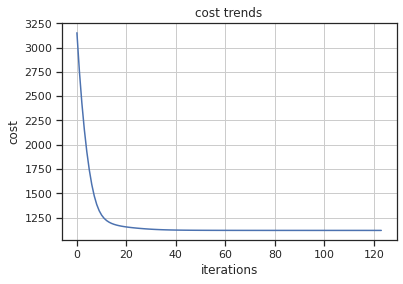

The TRAINING f1-score was 0.793 and precision was 0.851 and recall was 0.743
The TESTING f1-score was 0.609 and precision was 0.515 and recall was 0.745
W: [-0.61362599 -0.05255619  0.05617883  0.10131634  0.01160502  0.32072961
 -0.66383988  2.01330884 -0.07617738 -0.08339115  0.00454793 -0.09169487
  0.04058063  0.09954971  0.47478411 -0.02817541 -0.13717486]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 110/5000 [00:00<00:12, 382.66it/s]


The model stopped learning


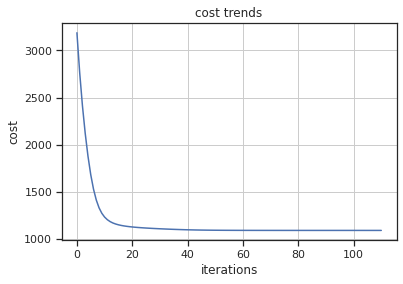

The TRAINING f1-score was 0.797 and precision was 0.86 and recall was 0.742
The TESTING f1-score was 0.616 and precision was 0.532 and recall was 0.729
W: [-0.60067766  0.00508873  0.013435    0.01819855  0.03627502  0.27319208
 -0.69037854  2.28786474 -0.06414714 -0.02409838  0.08255574 -0.03010797
  0.01367473  0.04881553  0.48548486 -0.02303811 -0.17569799]


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-28-dbb7d59a2ffd>:51: RuntimeWarning: divide by zero encountered in log
  loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig)) # vector
  2%|▏         | 118/5000 [00:00<00:15, 312.66it/s]


The model stopped learning


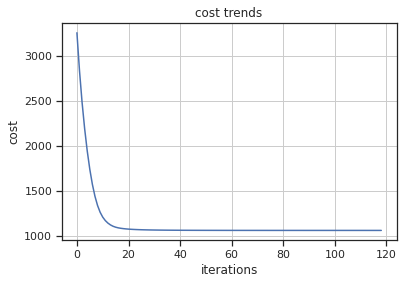

The TRAINING f1-score was 0.802 and precision was 0.867 and recall was 0.746
The TESTING f1-score was 0.61 and precision was 0.524 and recall was 0.729
W: [-0.57545593  0.11214477 -0.05400949  0.10460932  0.02141129  0.24749667
 -0.61458115  2.46500645 -0.09887483 -0.13589753  0.00730772 -0.02970723
 -0.02436132  0.07155509  0.5333009  -0.0545527  -0.12416894]
Starts model: NaiveBayes
Building models with sample size :  25


100%|██████████| 3699/3699 [03:44<00:00, 16.44it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:      value                               coeff_name
0   0.3125   OperatingSystems_-1.2121785649681136_0
0   0.1250   OperatingSystems_-1.2121785649681136_1
0   0.3125  OperatingSystems_-0.13572607581406873_0
0   0.5625  OperatingSystems_-0.13572607581406873_1
0   0.2500    OperatingSystems_0.9407264133399762_0
..     ...                                      ...
0   0.1000         Month_int_-0.47988089239415316_1
0   0.1000          Month_int_-1.3617974521987422_0
0   0.0500          Month_int_-1.3617974521987422_1
0   0.0500          Month_int_0.40203566741043595_0
0   0.1500          Month_int_0.40203566741043595_1

[70 rows x 2 columns]


  0%|          | 0/3699 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 3699/3699 [03:01<00:00, 20.43it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.187500   OperatingSystems_-1.2121785649681136_0
0   0.312500   OperatingSystems_-1.2121785649681136_1
0   0.500000  OperatingSystems_-0.13572607581406873_0
0   0.562500  OperatingSystems_-0.13572607581406873_1
0   0.125000     OperatingSystems_2.017178902494021_0
..       ...                                      ...
0   0.105263          Month_int_0.40203566741043595_1
0   0.052632            Month_int_1.283952227215025_0
0   0.105263            Month_int_1.283952227215025_1
0   0.052632         Month_int_-0.18590870579262345_0
0   0.105263         Month_int_-0.18590870579262345_1

[64 rows x 2 columns]


  0%|          | 0/3699 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|          | 5/3699 [00:00<03:01, 20.31it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 3699/3699 [03:05<00:00, 19.94it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.250000    OperatingSystems_0.9407264133399762_0
0   0.125000    OperatingSystems_0.9407264133399762_1
0   0.375000  OperatingSystems_-0.13572607581406873_0
0   0.437500  OperatingSystems_-0.13572607581406873_1
0   0.250000   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.052632          Month_int_0.10806348080890624_1
0   0.157895            Month_int_1.283952227215025_0
0   0.263158            Month_int_1.283952227215025_1
0   0.052632           Month_int_0.6960078540119656_0
0   0.157895           Month_int_0.6960078540119656_1

[62 rows x 2 columns]


  0%|          | 0/3699 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|          | 8/3699 [00:00<03:01, 20.34it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 3699/3699 [03:06<00:00, 19.84it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.500000  OperatingSystems_-0.13572607581406873_0
0   0.500000  OperatingSystems_-0.13572607581406873_1
0   0.250000    OperatingSystems_0.9407264133399762_0
0   0.187500    OperatingSystems_0.9407264133399762_1
0   0.125000     OperatingSystems_2.017178902494021_0
..       ...                                      ...
0   0.111111            Month_int_1.283952227215025_1
0   0.111111          Month_int_-1.3617974521987422_0
0   0.166667          Month_int_-1.3617974521987422_1
0   0.055556           Month_int_0.6960078540119656_0
0   0.111111           Month_int_0.6960078540119656_1

[62 rows x 2 columns]


100%|██████████| 3699/3699 [03:04<00:00, 20.10it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:       value                               coeff_name
0  0.312500    OperatingSystems_0.9407264133399762_0
0  0.062500    OperatingSystems_0.9407264133399762_1
0  0.500000  OperatingSystems_-0.13572607581406873_0
0  0.562500  OperatingSystems_-0.13572607581406873_1
0  0.125000     OperatingSystems_2.017178902494021_0
0  0.062500     OperatingSystems_2.017178902494021_1
0  0.062500   OperatingSystems_-1.2121785649681136_0
0  0.312500   OperatingSystems_-1.2121785649681136_1
0  0.588235            Browser_-0.2148488693234674_0
0  0.470588            Browser_-0.2148488693234674_1
0  0.176471              Browser_1.510808183166945_0
0  0.058824              Browser_1.510808183166945_1
0  0.117647             Browser_2.0860272006637492_0
0  0.058824             Browser_2.0860272006637492_1
0  0.058824            Browser_-0.7900678868202715_0
0  0.294118            Browser_-0.7900678868202715_1
0  0.058824             Browser_0.9355891656701409_

  0%|          | 0/3699 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|          | 4/3699 [00:00<03:20, 18.40it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 3699/3699 [03:00<00:00, 20.51it/s]


Building models with sample size :  50


100%|██████████| 3699/3699 [03:38<00:00, 16.90it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.482759  OperatingSystems_-0.13572607581406873_0
0   0.482759  OperatingSystems_-0.13572607581406873_1
0   0.275862   OperatingSystems_-1.2121785649681136_0
0   0.137931   OperatingSystems_-1.2121785649681136_1
0   0.206897    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.090909           Month_int_0.6960078540119656_1
0   0.060606         Month_int_-0.18590870579262345_0
0   0.030303         Month_int_-0.18590870579262345_1
0   0.030303          Month_int_0.10806348080890624_0
0   0.060606          Month_int_0.10806348080890624_1

[82 rows x 2 columns]


100%|██████████| 3699/3699 [02:57<00:00, 20.80it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.517241  OperatingSystems_-0.13572607581406873_0
0   0.517241  OperatingSystems_-0.13572607581406873_1
0   0.241379    OperatingSystems_0.9407264133399762_0
0   0.172414    OperatingSystems_0.9407264133399762_1
0   0.172414   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.058824          Month_int_0.10806348080890624_1
0   0.029412           Month_int_0.6960078540119656_0
0   0.205882           Month_int_0.6960078540119656_1
0   0.029412          Month_int_0.40203566741043595_0
0   0.058824          Month_int_0.40203566741043595_1

[76 rows x 2 columns]


  0%|          | 0/3699 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
  0%|          | 3/3699 [00:00<02:52, 21.42it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 3699/3699 [02:58<00:00, 20.75it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.310345   OperatingSystems_-1.2121785649681136_0
0   0.275862   OperatingSystems_-1.2121785649681136_1
0   0.413793  OperatingSystems_-0.13572607581406873_0
0   0.517241  OperatingSystems_-0.13572607581406873_1
0   0.241379    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.117647          Month_int_0.40203566741043595_1
0   0.029412          Month_int_0.10806348080890624_0
0   0.058824          Month_int_0.10806348080890624_1
0   0.029412          Month_int_-1.6557696388002718_0
0   0.058824          Month_int_-1.6557696388002718_1

[74 rows x 2 columns]


100%|██████████| 3699/3699 [02:58<00:00, 20.76it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.178571    OperatingSystems_0.9407264133399762_0
0   0.178571    OperatingSystems_0.9407264133399762_1
0   0.571429  OperatingSystems_-0.13572607581406873_0
0   0.642857  OperatingSystems_-0.13572607581406873_1
0   0.250000   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.060606          Month_int_0.10806348080890624_1
0   0.060606          Month_int_0.40203566741043595_0
0   0.030303          Month_int_0.40203566741043595_1
0   0.030303            Month_int_1.283952227215025_0
0   0.121212            Month_int_1.283952227215025_1

[80 rows x 2 columns]


100%|██████████| 3699/3699 [02:57<00:00, 20.79it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.100000     OperatingSystems_2.017178902494021_0
0   0.033333     OperatingSystems_2.017178902494021_1
0   0.533333  OperatingSystems_-0.13572607581406873_0
0   0.500000  OperatingSystems_-0.13572607581406873_1
0   0.233333    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.090909          Month_int_0.40203566741043595_1
0   0.030303           Month_int_0.6960078540119656_0
0   0.151515           Month_int_0.6960078540119656_1
0   0.030303          Month_int_0.10806348080890624_0
0   0.060606          Month_int_0.10806348080890624_1

[76 rows x 2 columns]


  0%|          | 0/3699 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
100%|██████████| 3699/3699 [02:58<00:00, 20.68it/s]


Building models with sample size :  100


100%|██████████| 3699/3699 [03:35<00:00, 17.16it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.388889  OperatingSystems_-0.13572607581406873_0
0   0.703704  OperatingSystems_-0.13572607581406873_1
0   0.259259   OperatingSystems_-1.2121785649681136_0
0   0.111111   OperatingSystems_-1.2121785649681136_1
0   0.259259    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.016667         Month_int_-0.47988089239415316_1
0   0.050000          Month_int_0.40203566741043595_0
0   0.083333          Month_int_0.40203566741043595_1
0   0.016667          Month_int_-1.6557696388002718_0
0   0.033333          Month_int_-1.6557696388002718_1

[86 rows x 2 columns]


100%|██████████| 3699/3699 [03:00<00:00, 20.52it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.145455   OperatingSystems_-1.2121785649681136_0
0   0.072727   OperatingSystems_-1.2121785649681136_1
0   0.509091  OperatingSystems_-0.13572607581406873_0
0   0.654545  OperatingSystems_-0.13572607581406873_1
0   0.236364    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.101695          Month_int_0.40203566741043595_1
0   0.033898         Month_int_-0.47988089239415316_0
0   0.050847         Month_int_-0.47988089239415316_1
0   0.050847           Month_int_0.6960078540119656_0
0   0.050847           Month_int_0.6960078540119656_1

[84 rows x 2 columns]


100%|██████████| 3699/3699 [02:58<00:00, 20.71it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.333333   OperatingSystems_-1.2121785649681136_0
0   0.203704   OperatingSystems_-1.2121785649681136_1
0   0.425926  OperatingSystems_-0.13572607581406873_0
0   0.611111  OperatingSystems_-0.13572607581406873_1
0   0.092593     OperatingSystems_2.017178902494021_0
..       ...                                      ...
0   0.101695          Month_int_0.40203566741043595_1
0   0.016949         Month_int_-0.18590870579262345_0
0   0.050847         Month_int_-0.18590870579262345_1
0   0.016949         Month_int_-0.47988089239415316_0
0   0.033898         Month_int_-0.47988089239415316_1

[92 rows x 2 columns]


100%|██████████| 3699/3699 [02:58<00:00, 20.72it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.581818  OperatingSystems_-0.13572607581406873_0
0   0.509091  OperatingSystems_-0.13572607581406873_1
0   0.200000   OperatingSystems_-1.2121785649681136_0
0   0.181818   OperatingSystems_-1.2121785649681136_1
0   0.163636    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.366667           Month_int_0.9899800406134953_1
0   0.033333          Month_int_-1.6557696388002718_0
0   0.016667          Month_int_-1.6557696388002718_1
0   0.016667          Month_int_0.10806348080890624_0
0   0.033333          Month_int_0.10806348080890624_1

[88 rows x 2 columns]


100%|██████████| 3699/3699 [03:00<00:00, 20.49it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.277778    OperatingSystems_0.9407264133399762_0
0   0.092593    OperatingSystems_0.9407264133399762_1
0   0.222222   OperatingSystems_-1.2121785649681136_0
0   0.148148   OperatingSystems_-1.2121785649681136_1
0   0.462963  OperatingSystems_-0.13572607581406873_0
..       ...                                      ...
0   0.033333          Month_int_0.10806348080890624_1
0   0.033333          Month_int_-1.6557696388002718_0
0   0.016667          Month_int_-1.6557696388002718_1
0   0.050000         Month_int_-0.47988089239415316_0
0   0.016667         Month_int_-0.47988089239415316_1

[88 rows x 2 columns]


100%|██████████| 3699/3699 [03:00<00:00, 20.45it/s]


Building models with sample size :  500


100%|██████████| 3699/3699 [03:46<00:00, 16.37it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.202335   OperatingSystems_-1.2121785649681136_0
0   0.186770   OperatingSystems_-1.2121785649681136_1
0   0.599222  OperatingSystems_-0.13572607581406873_0
0   0.595331  OperatingSystems_-0.13572607581406873_1
0   0.143969    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.038462           Month_int_0.6960078540119656_1
0   0.053846          Month_int_0.10806348080890624_0
0   0.042308          Month_int_0.10806348080890624_1
0   0.023077          Month_int_0.40203566741043595_0
0   0.069231          Month_int_0.40203566741043595_1

[110 rows x 2 columns]


100%|██████████| 3699/3699 [03:12<00:00, 19.18it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                              coeff_name
0   0.218750   OperatingSystems_0.9407264133399762_0
0   0.109375   OperatingSystems_0.9407264133399762_1
0   0.210938  OperatingSystems_-1.2121785649681136_0
0   0.175781  OperatingSystems_-1.2121785649681136_1
0   0.046875    OperatingSystems_2.017178902494021_0
..       ...                                     ...
0   0.046154        Month_int_-0.18590870579262345_1
0   0.046154          Month_int_0.6960078540119656_0
0   0.061538          Month_int_0.6960078540119656_1
0   0.023077        Month_int_-0.47988089239415316_0
0   0.026923        Month_int_-0.47988089239415316_1

[104 rows x 2 columns]


100%|██████████| 3699/3699 [03:14<00:00, 19.06it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                              coeff_name
0   0.027344    OperatingSystems_2.017178902494021_0
0   0.054688    OperatingSystems_2.017178902494021_1
0   0.214844   OperatingSystems_0.9407264133399762_0
0   0.121094   OperatingSystems_0.9407264133399762_1
0   0.214844  OperatingSystems_-1.2121785649681136_0
..       ...                                     ...
0   0.026923         Month_int_0.40203566741043595_1
0   0.026923         Month_int_-1.6557696388002718_0
0   0.003846         Month_int_-1.6557696388002718_1
0   0.038462        Month_int_-0.18590870579262345_0
0   0.026923        Month_int_-0.18590870579262345_1

[102 rows x 2 columns]


100%|██████████| 3699/3699 [03:17<00:00, 18.77it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.241245    OperatingSystems_0.9407264133399762_0
0   0.124514    OperatingSystems_0.9407264133399762_1
0   0.494163  OperatingSystems_-0.13572607581406873_0
0   0.599222  OperatingSystems_-0.13572607581406873_1
0   0.190661   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.065385           Month_int_0.6960078540119656_1
0   0.030769          Month_int_0.40203566741043595_0
0   0.053846          Month_int_0.40203566741043595_1
0   0.023077          Month_int_-1.6557696388002718_0
0   0.003846          Month_int_-1.6557696388002718_1

[104 rows x 2 columns]


100%|██████████| 3699/3699 [03:19<00:00, 18.51it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.505837  OperatingSystems_-0.13572607581406873_0
0   0.552529  OperatingSystems_-0.13572607581406873_1
0   0.210117    OperatingSystems_0.9407264133399762_0
0   0.128405    OperatingSystems_0.9407264133399762_1
0   0.202335   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.092308            Month_int_1.283952227215025_1
0   0.030769           Month_int_0.6960078540119656_0
0   0.053846           Month_int_0.6960078540119656_1
0   0.015385          Month_int_-1.6557696388002718_0
0   0.003846          Month_int_-1.6557696388002718_1

[108 rows x 2 columns]


100%|██████████| 3699/3699 [03:18<00:00, 18.67it/s]


Building models with sample size :  1000


100%|██████████| 3699/3699 [03:48<00:00, 16.16it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.205534   OperatingSystems_-1.2121785649681136_0
0   0.219368   OperatingSystems_-1.2121785649681136_1
0   0.551383  OperatingSystems_-0.13572607581406873_0
0   0.573123  OperatingSystems_-0.13572607581406873_1
0   0.195652    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.037255         Month_int_-0.18590870579262345_1
0   0.031373          Month_int_0.40203566741043595_0
0   0.054902          Month_int_0.40203566741043595_1
0   0.021569         Month_int_-0.47988089239415316_0
0   0.019608         Month_int_-0.47988089239415316_1

[106 rows x 2 columns]


100%|██████████| 3699/3699 [03:18<00:00, 18.60it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.211462    OperatingSystems_0.9407264133399762_0
0   0.140316    OperatingSystems_0.9407264133399762_1
0   0.533597  OperatingSystems_-0.13572607581406873_0
0   0.604743  OperatingSystems_-0.13572607581406873_1
0   0.205534   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.090196          Month_int_-1.3617974521987422_1
0   0.037255          Month_int_0.40203566741043595_0
0   0.047059          Month_int_0.40203566741043595_1
0   0.025490          Month_int_0.10806348080890624_0
0   0.041176          Month_int_0.10806348080890624_1

[112 rows x 2 columns]


100%|██████████| 3699/3699 [03:17<00:00, 18.73it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.243564    OperatingSystems_0.9407264133399762_0
0   0.128713    OperatingSystems_0.9407264133399762_1
0   0.504950  OperatingSystems_-0.13572607581406873_0
0   0.600000  OperatingSystems_-0.13572607581406873_1
0   0.033663     OperatingSystems_2.017178902494021_0
..       ...                                      ...
0   0.121569            Month_int_1.283952227215025_1
0   0.017647          Month_int_-1.6557696388002718_0
0   0.001961          Month_int_-1.6557696388002718_1
0   0.033333           Month_int_0.6960078540119656_0
0   0.052941           Month_int_0.6960078540119656_1

[104 rows x 2 columns]


100%|██████████| 3699/3699 [03:16<00:00, 18.79it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.521739  OperatingSystems_-0.13572607581406873_0
0   0.616601  OperatingSystems_-0.13572607581406873_1
0   0.215415    OperatingSystems_0.9407264133399762_0
0   0.134387    OperatingSystems_0.9407264133399762_1
0   0.209486   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.060784           Month_int_0.6960078540119656_1
0   0.033333          Month_int_0.40203566741043595_0
0   0.050980          Month_int_0.40203566741043595_1
0   0.009804         Month_int_-0.47988089239415316_0
0   0.019608         Month_int_-0.47988089239415316_1

[104 rows x 2 columns]


100%|██████████| 3699/3699 [03:24<00:00, 18.12it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.250493   OperatingSystems_-1.2121785649681136_0
0   0.213018   OperatingSystems_-1.2121785649681136_1
0   0.487179  OperatingSystems_-0.13572607581406873_0
0   0.585799  OperatingSystems_-0.13572607581406873_1
0   0.039448     OperatingSystems_2.017178902494021_0
..       ...                                      ...
0   0.003922          Month_int_-1.6557696388002718_1
0   0.035294          Month_int_0.10806348080890624_0
0   0.031373          Month_int_0.10806348080890624_1
0   0.023529           Month_int_0.6960078540119656_0
0   0.060784           Month_int_0.6960078540119656_1

[110 rows x 2 columns]


100%|██████████| 3699/3699 [03:20<00:00, 18.43it/s]


Building models with sample size :  1500


100%|██████████| 3699/3699 [03:47<00:00, 16.28it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.232804    OperatingSystems_0.9407264133399762_0
0   0.140212    OperatingSystems_0.9407264133399762_1
0   0.211640   OperatingSystems_-1.2121785649681136_0
0   0.179894   OperatingSystems_-1.2121785649681136_1
0   0.507937  OperatingSystems_-0.13572607581406873_0
..       ...                                      ...
0   0.034211         Month_int_-0.18590870579262345_1
0   0.015789          Month_int_-1.6557696388002718_0
0   0.002632          Month_int_-1.6557696388002718_1
0   0.017105         Month_int_-0.47988089239415316_0
0   0.015789         Month_int_-0.47988089239415316_1

[110 rows x 2 columns]


100%|██████████| 3699/3699 [03:15<00:00, 18.92it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.211082    OperatingSystems_0.9407264133399762_0
0   0.139842    OperatingSystems_0.9407264133399762_1
0   0.523747  OperatingSystems_-0.13572607581406873_0
0   0.610818  OperatingSystems_-0.13572607581406873_1
0   0.212401   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.036842          Month_int_0.10806348080890624_1
0   0.025000         Month_int_-0.47988089239415316_0
0   0.013158         Month_int_-0.47988089239415316_1
0   0.015789          Month_int_-1.6557696388002718_0
0   0.005263          Month_int_-1.6557696388002718_1

[116 rows x 2 columns]


100%|██████████| 3699/3699 [03:11<00:00, 19.31it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.535007  OperatingSystems_-0.13572607581406873_0
0   0.593131  OperatingSystems_-0.13572607581406873_1
0   0.216645    OperatingSystems_0.9407264133399762_0
0   0.141347    OperatingSystems_0.9407264133399762_1
0   0.200793   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.032895         Month_int_-0.18590870579262345_1
0   0.043421           Month_int_0.6960078540119656_0
0   0.060526           Month_int_0.6960078540119656_1
0   0.014474          Month_int_-1.6557696388002718_0
0   0.003947          Month_int_-1.6557696388002718_1

[114 rows x 2 columns]


100%|██████████| 3699/3699 [03:17<00:00, 18.69it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.485488  OperatingSystems_-0.13572607581406873_0
0   0.605541  OperatingSystems_-0.13572607581406873_1
0   0.233509   OperatingSystems_-1.2121785649681136_0
0   0.201847   OperatingSystems_-1.2121785649681136_1
0   0.229551    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.039474          Month_int_0.40203566741043595_1
0   0.030263           Month_int_0.6960078540119656_0
0   0.064474           Month_int_0.6960078540119656_1
0   0.017105         Month_int_-0.47988089239415316_0
0   0.018421         Month_int_-0.47988089239415316_1

[116 rows x 2 columns]


100%|██████████| 3699/3699 [03:21<00:00, 18.39it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.516513  OperatingSystems_-0.13572607581406873_0
0   0.597094  OperatingSystems_-0.13572607581406873_1
0   0.232497    OperatingSystems_0.9407264133399762_0
0   0.137384    OperatingSystems_0.9407264133399762_1
0   0.194188   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.001316          Month_int_-1.6557696388002718_1
0   0.018421         Month_int_-0.47988089239415316_0
0   0.011842         Month_int_-0.47988089239415316_1
0   0.036842         Month_int_-0.18590870579262345_0
0   0.027632         Month_int_-0.18590870579262345_1

[114 rows x 2 columns]


100%|██████████| 3699/3699 [03:22<00:00, 18.26it/s]


Building models with sample size :  2000


100%|██████████| 3699/3699 [03:39<00:00, 16.86it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.498016  OperatingSystems_-0.13572607581406873_0
0   0.618056  OperatingSystems_-0.13572607581406873_1
0   0.215278    OperatingSystems_0.9407264133399762_0
0   0.128968    OperatingSystems_0.9407264133399762_1
0   0.230159   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.059406           Month_int_0.6960078540119656_1
0   0.048515          Month_int_0.10806348080890624_0
0   0.041584          Month_int_0.10806348080890624_1
0   0.022772          Month_int_-1.6557696388002718_0
0   0.003960          Month_int_-1.6557696388002718_1

[114 rows x 2 columns]


100%|██████████| 3699/3699 [03:04<00:00, 20.02it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.232373    OperatingSystems_0.9407264133399762_0
0   0.135055    OperatingSystems_0.9407264133399762_1
0   0.209533   OperatingSystems_-1.2121785649681136_0
0   0.195631   OperatingSystems_-1.2121785649681136_1
0   0.500497  OperatingSystems_-0.13572607581406873_0
..       ...                                      ...
0   0.038614          Month_int_0.10806348080890624_1
0   0.037624          Month_int_0.40203566741043595_0
0   0.042574          Month_int_0.40203566741043595_1
0   0.020792         Month_int_-0.47988089239415316_0
0   0.018812         Month_int_-0.47988089239415316_1

[116 rows x 2 columns]


100%|██████████| 3699/3699 [03:13<00:00, 19.11it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.217262    OperatingSystems_0.9407264133399762_0
0   0.132937    OperatingSystems_0.9407264133399762_1
0   0.529762  OperatingSystems_-0.13572607581406873_0
0   0.610119  OperatingSystems_-0.13572607581406873_1
0   0.211310   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.027723         Month_int_-0.18590870579262345_1
0   0.032673          Month_int_0.40203566741043595_0
0   0.045545          Month_int_0.40203566741043595_1
0   0.019802          Month_int_0.10806348080890624_0
0   0.039604          Month_int_0.10806348080890624_1

[118 rows x 2 columns]


100%|██████████| 3699/3699 [03:03<00:00, 20.16it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.518849  OperatingSystems_-0.13572607581406873_0
0   0.610119  OperatingSystems_-0.13572607581406873_1
0   0.217262    OperatingSystems_0.9407264133399762_0
0   0.129960    OperatingSystems_0.9407264133399762_1
0   0.006944     OperatingSystems_6.322988859110201_0
..       ...                                      ...
0   0.058416           Month_int_0.6960078540119656_1
0   0.040594         Month_int_-0.18590870579262345_0
0   0.035644         Month_int_-0.18590870579262345_1
0   0.020792         Month_int_-0.47988089239415316_0
0   0.016832         Month_int_-0.47988089239415316_1

[116 rows x 2 columns]


100%|██████████| 3699/3699 [03:00<00:00, 20.45it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.534722  OperatingSystems_-0.13572607581406873_0
0   0.603175  OperatingSystems_-0.13572607581406873_1
0   0.200397    OperatingSystems_0.9407264133399762_0
0   0.128968    OperatingSystems_0.9407264133399762_1
0   0.207341   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.044554          Month_int_0.10806348080890624_1
0   0.023762         Month_int_-0.47988089239415316_0
0   0.017822         Month_int_-0.47988089239415316_1
0   0.025743          Month_int_-1.6557696388002718_0
0   0.002970          Month_int_-1.6557696388002718_1

[112 rows x 2 columns]


100%|██████████| 3699/3699 [02:59<00:00, 20.63it/s]


Building models with sample size :  2500


100%|██████████| 3699/3699 [03:28<00:00, 17.73it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.510334  OperatingSystems_-0.13572607581406873_0
0   0.609698  OperatingSystems_-0.13572607581406873_1
0   0.219396   OperatingSystems_-1.2121785649681136_0
0   0.196343   OperatingSystems_-1.2121785649681136_1
0   0.217011    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.057143           Month_int_0.6960078540119656_1
0   0.028571          Month_int_0.40203566741043595_0
0   0.043651          Month_int_0.40203566741043595_1
0   0.030159          Month_int_0.10806348080890624_0
0   0.040476          Month_int_0.10806348080890624_1

[118 rows x 2 columns]


100%|██████████| 3699/3699 [03:00<00:00, 20.50it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.526232  OperatingSystems_-0.13572607581406873_0
0   0.608903  OperatingSystems_-0.13572607581406873_1
0   0.214626   OperatingSystems_-1.2121785649681136_0
0   0.197138   OperatingSystems_-1.2121785649681136_1
0   0.206677    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.031746         Month_int_-0.18590870579262345_1
0   0.037302          Month_int_0.10806348080890624_0
0   0.042063          Month_int_0.10806348080890624_1
0   0.016667         Month_int_-0.47988089239415316_0
0   0.018254         Month_int_-0.47988089239415316_1

[120 rows x 2 columns]


100%|██████████| 3699/3699 [02:56<00:00, 20.93it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.509539  OperatingSystems_-0.13572607581406873_0
0   0.606518  OperatingSystems_-0.13572607581406873_1
0   0.223370   OperatingSystems_-1.2121785649681136_0
0   0.195548   OperatingSystems_-1.2121785649681136_1
0   0.222576    OperatingSystems_0.9407264133399762_0
..       ...                                      ...
0   0.003175          Month_int_-1.6557696388002718_1
0   0.030159          Month_int_0.10806348080890624_0
0   0.038889          Month_int_0.10806348080890624_1
0   0.042857         Month_int_-0.18590870579262345_0
0   0.033333         Month_int_-0.18590870579262345_1

[120 rows x 2 columns]


100%|██████████| 3699/3699 [02:57<00:00, 20.80it/s]


priors: 0.5 0.5
La Place Smoothing
likelihoods:        value                               coeff_name
0   0.508744  OperatingSystems_-0.13572607581406873_0
0   0.608108  OperatingSystems_-0.13572607581406873_1
0   0.223370    OperatingSystems_0.9407264133399762_0
0   0.130366    OperatingSystems_0.9407264133399762_1
0   0.217806   OperatingSystems_-1.2121785649681136_0
..       ...                                      ...
0   0.041270          Month_int_0.40203566741043595_1
0   0.036508         Month_int_-0.18590870579262345_0
0   0.033333         Month_int_-0.18590870579262345_1
0   0.028571         Month_int_-0.47988089239415316_0
0   0.016667         Month_int_-0.47988089239415316_1

[118 rows x 2 columns]


 38%|███▊      | 1393/3699 [01:12<02:06, 18.29it/s]

In [ ]:
# Generating the bias and variance for various sample sizes

num_samples = [25, 50,100,500,1000,1500, 2000, 2500]
num_models = 5
lenNoOfSamples = len(num_samples)
model_names = ["LR", "NaiveBayes", "SVM"]
#model_names = ["SVM"]
bias_variance_result = pd.DataFrame()
print('Building Model for samples ', num_samples)
for m in model_names:
  print("Starts model:",m)
  if m == "SVM":
    for i in range(0, 4):
      num_sample = num_samples[i]
      print('Building models with sample size : ', num_sample)
      res = bias_variance(X_train = X_train, 
                          y_train = y_train, 
                          X_test = X_test, 
                          y_test = y_test, 
                          model_class_name = m, 
                          num_models = num_models, 
                          num_samples = num_sample)
      res["model"] = m
      res["sample"] = num_sample
      bias_variance_result = bias_variance_result.append(res)
  else:
    for i in range(0, lenNoOfSamples):
      num_sample = num_samples[i]
      print('Building models with sample size : ', num_sample)
      res = bias_variance(X_train = X_train, 
                  y_train = y_train, 
                  X_test = X_test, 
                  y_test = y_test, 
                  model_class_name = m, 
                  num_models = num_models, 
                  num_samples = num_sample)
      res["model"] = m
      res["sample"] = num_sample
      bias_variance_result = bias_variance_result.append(res)
  bias_variance_result.reset_index(inplace=True)
  bias_variance_result.drop(['index'], axis=1, inplace=True)


In [ ]:
bias_variance_result

,bias,variance,mse,model,sample
0,0.101739,0.0560,0.2770,LR,25
1,0.058976,0.0580,0.2104,LR,50
2,0.033036,0.0261,0.1458,LR,100
3,0.037753,0.0071,0.1198,LR,500
4,0.039719,0.0020,0.1295,LR,1000
5,0.037331,0.0012,0.1276,LR,1500
6,0.036959,0.0009,0.1219,LR,2000
7,0.037618,0.0005,0.1258,LR,2500
8,0.031126,0.0476,0.1579,NaiveBayes,25
9,0.146210,0.2139,0.1579,NaiveBayes,50


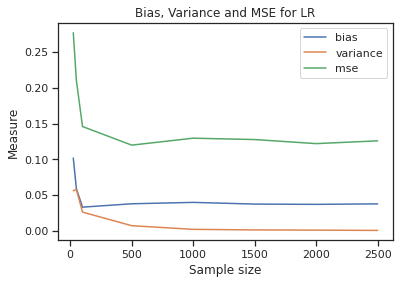

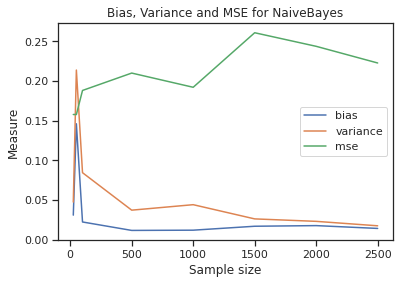

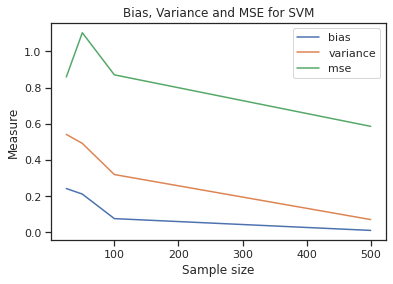

In [ ]:
# Plots
for i in ["LR", "NaiveBayes", "SVM"]:
  bias_variance_result[bias_variance_result["model"] == i].set_index('sample').plot()
  plt.title("Bias, Variance and MSE for {}".format(i))
  plt.xlabel("Sample size")
  plt.ylabel("Measure")
  plt.show()

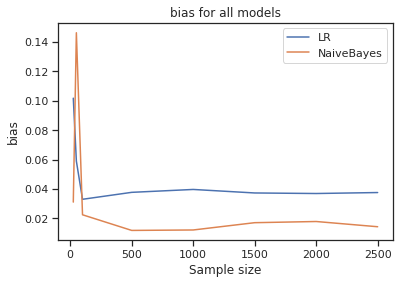

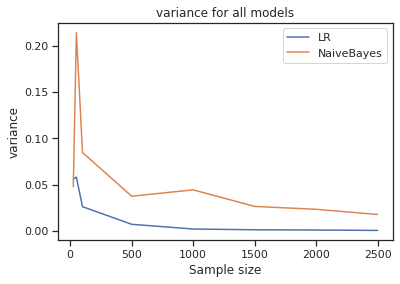

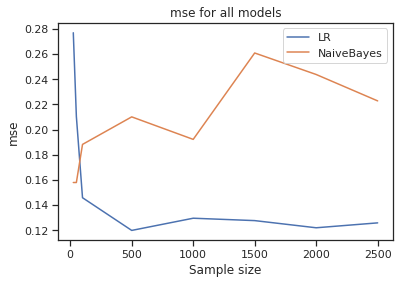

In [ ]:
for i in ["bias", "variance", "mse"]:
  for l in ["LR","NaiveBayes"]:
    bias_variance_result[bias_variance_result['model']==l].set_index('sample')[i].plot(label = l)
    plt.title("{} for all models".format(i))
    plt.xlabel("Sample size")
    plt.ylabel(i)
  plt.legend()
  plt.show()

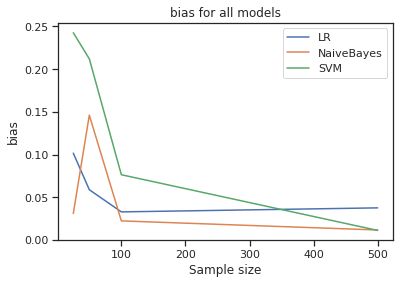

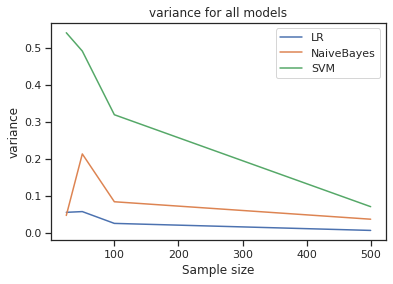

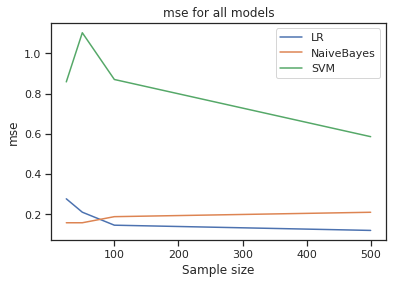

In [ ]:
bias_variance_result_temp = bias_variance_result[bias_variance_result["sample"].isin([25, 50,100,500])]
for i in ["bias", "variance", "mse"]:
  for l in ["LR","NaiveBayes", "SVM"]: 
    bias_variance_result_temp[bias_variance_result_temp['model']==l].set_index('sample')[i].plot(label = l)
    plt.title("{} for all models".format(i))
    plt.xlabel("Sample size")
    plt.ylabel(i)
  plt.legend()
  plt.show()